# Pillar 5: Capstone Project_30-Day Hospital Readmission Prediction

## Problem Background

>   *"The Centers for Medicare & Medicaid Services (CMS) of the U.S. government pays hospital for Medicare patients (low-income government-insured patients). Thus, they established to define hospital quality metrics and directly ties their payment to the hospital performance."*

>   *"One of their quality metrics is Hospital Readmission within 30 days which is a proxy for quality care and a sign of poor discharge planning, care coordination, or follow-up. Because of this, CMS treats avoidable readmissions as costly failures and penalizes hospitals by losing a percentage of total Medicare inpatient payments."*
>   *"Since safety-net hospitals that serve sicker or older population would be unfairly punished, CMS risk-adjustment exists for age, sex, comorbidities, prior diagnoses, clinical severity, and past utilization."*

>   *"Readmission reduction indirectly helps hospitals by keeping bonuses, avoid downstream losses, and improve insurer negotiations."*


*******************************************
### **Step 1: Problem Understanding & Framing**
*******************************************

>  *"This project mirrors **CMS risk-adjusted readmission modeling** used in U.S. hospital reimbursement, where inaccurate prediction can lead to multi-million-dollar penalties."*

#### Risk-adjusted Benchmarks Table:

| **Aspect** | **CMS Approach** |
|------------|------------------|
| Metric | 30-day unplanned readmission |
| Model type | Risk-adjusted logistic regression |
| Adjustment factors | Age, comorbidities, clinical history |
| Financial impact | Up to ~3% Medicate payment reduction |
| Incentive structure | Penalty-focused |


*******************************************
### **Step 2: Data Collection & Understanding**
*******************************************


> *"The data set represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery network."*

> *"It includes over 50 features representing patient and hospital outcomes where different situations could be possibly identified if it will result to <30-day readmission or not."*



#### **Dataset Summary:**

| Attribute | Description |
|-----------|-------------|
| Number of patients | ~100,000 hospital encounters |
| Number of features | 50 raw columns |
| Target variable | 30-day readmission status |
| Class Imbalance | Yes (~11% readmitted within 30 days) |


#### **Feature Categories:**
| Demographic Features | Admission & Discharge Information | Clinical & Diagnosis Features | Medication & Treatment Indicators | Utilization History |
|----------------------|-----------------------------------|-------------------------------|-----------------------------------|---------------------|
| `age` | `admission_type` | `num_lab_procedures` | `insulin` | `number_inpatient` |
| `gender` | `admission_source` | `num_medications` | `metformin` | `number_emergency` |
| `race` | `discharge_disposition` | `number_diagnoses` | `change` | `number_outpatient` |
| `payer_code` | `time_in_hospital` | `diag_1, diag_2, diag_3` | `diabetesMed` |


#### **Data Dictionary:**

| Variable Name | Type | Description | Allowed Values |
|---------------|------|-------------|----------------|
| `encounter_id` | integer | unique identifier for each hospital encounter ... | 12522-443867222 |
| `patient_nbr` | integer | unique identifier for each patient | 135-189502619 |
| `race` | object | patient's race | AfricanAmerican, Asian, .. |
| `gender` | object | patient's gender | Female, Male, Unknown |
| `age` | object | age group of the patient, reported in intervals | [0-10), [10-20), .. |


| Variable Name | Type | Description | Allowed Values |
|---------------|------|-------------|----------------|
| `weight` | object | patient weight in pounds | [0-25), [100-125) |
| `admission_type_id` | integer | encoded type of hospital admission | 1-8 |
| `discharge_disposition_id` | integer | encoded discharge outcome | 1-28 |
| `admission_source_id` | integer | source of admission (physician referral, emerg... | 1-25 |
| `time_in_hospital` | integer | length of stay in days | 1-14 |
| `payer_code` | object | type of insurance payer | MC, MD, BC, .. |
| `medical_specialty` | object | Physician specialty responsible for patient care | Hematology, Oncology,.. |
| `num_lab_procedures` | integer | number of laboratory tests performed during en... | 1-132 |
| `num_procedures` | integer | number of medical procedures | 0-6 |
| `num_medications` | integer | number of distinct medications administered | 1-81 |
| `number_outpatient` | integer | number of outpatient visits in the past year | 0-42 |
| `number_emergency` | integer | number of emergency visits in the past year | 0-76 |
| `number_inpatient` | integer | number of inpatient visits in the past year | 0-21 |
| `diag_1` | object | primary diagnosis | 250, 174, .. |
| `diag_2` | object | secondary diagnosis | 250, 174, .. |
| `diag_3` | object | tertiary diagnosis | 250, 174, .. |
| `number_diagnoses` | integer | number of diagnoses recorded for the encounter | 1-16 |
| `max_glu_serum` | object | maximum glucose serum test result | >200, Norm, .. |
| `A1Cresult` | object | HbA1c test result | >7, Norm, .. |
| `metformin` | object | medication treatment intensity and adjustment | Steady, Up, .. |
| `repaglinide` | object | medication treatment intensity and adjustment | Steady, Up, .. |
| `nateglinide` | object | medication treatment intensity and adjustment | Steady, Up, .. |
| `chlorpropamide` | object | medication treatment intensity and adjustment | Steady, Up, .. |
| `glimepiride` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `acetohexamide` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `glipizide` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `glyburide` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `tolbutamide` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `pioglitazone` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `rosiglitazone` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `acarbose` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `miglitol` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `troglitazone` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `tolazamide` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `examide` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `citoglipton` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `insulin` | object | medication treatment intensity and adjustment | Steady, Up, ..  |
| `glyburide-metformin` | object | combined usage status | Steady, Up, ..  |
| `glipizide-metformin` | object | combined usage status | Steady, Up, ..  |
| `glimepiride-pioglitazone` | object | combined usage status | Steady, Up, ..  |
| `metformin-rosiglitazone` | object | combined usage status | Steady, Up, ..  |
| `metformin-pioglitazone` | object | combined usage status | Steady, Up, ..  |
| `change` | object | whether any diabetes medication was changed | Ch, No |
| `diabetesMed` | object | whether the patient was prescribed any diabete... | Yes, No |
| `readmitted` | object | **Target variable** 30-day unplanned readmission | <30, >30, NO |


Source: UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

****************************************
### **Step 3: Data Preprocessing, EDA & Feature Engineering**
****************************************

In this part of the project, the following will be conducted:

1. Admission type, admission source and discharge disposition mapping of ID and its description which contribute to per patient encounter readmission result.
2. Handling missing data in the dataset.
3. Exploratory data analysis (EDA) to understand the structure, quality, and clinical context of the dataset.
4. Feature engineering to transform the said features into a new clinically meaningful data.
5. Feature selection to identify feature statistically associated with readmission and drop them.

#### **1. ID mapping**

In [36]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import shap

from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, accuracy_score, roc_auc_score, average_precision_score, precision_recall_curve, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

import scipy.stats as stats
from scipy.stats import f_oneway, chi2_contingency
from statsmodels.formula.api import ols

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import joblib

os.makedirs("models", exist_ok=True)

In [37]:
# File paths
diabetic_data_path = "D:/Initial_Documents/AIML Practice Files/AIM AIML Files/datasets/diabetic_data.csv"
ids_mapping_path = "D:/Initial_Documents/AIML Practice Files/AIM AIML Files/datasets/IDS_mapping.csv"

In [38]:
# First dataset: diabetic dataset
diabetic_data_df = pd.read_csv(diabetic_data_path)

# Display 1st dataset basic info
print("Diabetic Data Summary:")
print(diabetic_data_df.info(), "\n")

Diabetic Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non

In [39]:
# Second dataset: IDS Mapping Data
ids_mapping_df = pd.read_csv(ids_mapping_path)

# Display 2nd dataset basic info
print("IDS Mapping Summary:")
print(ids_mapping_df.info(),"\n")

IDS Mapping Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   admission_type_id  65 non-null     object
 1   description        62 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None 



In [40]:
ids_mapping_df.head(55)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [41]:
# Split the DataFrame into separate tables based on known row indices
admission_type_df = ids_mapping_df.iloc[0:8]
discharge_disposition_df = ids_mapping_df.iloc[10:40].reset_index(drop=True)
admission_source_df = ids_mapping_df.iloc[42:].reset_index(drop=True)

admission_type_df.columns = ['admission_type_id', 'admission_type_desc']
discharge_disposition_df.columns = ['discharge_disposition_id', 'discharge_disposition_desc']
admission_source_df.columns = ['admission_source_id', 'admission_source_desc']

In [42]:
# Display the first few rows of each DataFrame
print("Admission Type DataFrame:")
admission_type_df

Admission Type DataFrame:


,admission_type_id,admission_type_desc
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [43]:
print("Discharge Disposition DataFrame:")
discharge_disposition_df

Discharge Disposition DataFrame:


,discharge_disposition_id,discharge_disposition_desc
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [44]:
print("Admission Source DataFrame:")
admission_source_df

Admission Source DataFrame:


,admission_source_id,admission_source_desc
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [45]:
# Convert ID columns to integers to avoid dtype mismatches
admission_type_df.loc[:, 'admission_type_id'] = admission_type_df['admission_type_id'].astype(int)
discharge_disposition_df.loc[:, 'discharge_disposition_id'] = discharge_disposition_df['discharge_disposition_id'].astype(int)
admission_source_df.loc[:, 'admission_source_id'] = admission_source_df['admission_source_id'].astype(int)

In [46]:
# Merge with the main dataset
df = diabetic_data_df.merge(admission_type_df, on='admission_type_id', how='left')
df = df.merge(discharge_disposition_df, on='discharge_disposition_id', how='left')
df = df.merge(admission_source_df, on='admission_source_id', how='left')

In [47]:
# Drop old columns to avoid redundancy
df = df.drop(columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])

In [48]:
# Show basic info about the dataset (e.g., number of rows, columns, data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   encounter_id                101766 non-null  int64 
 1   patient_nbr                 101766 non-null  int64 
 2   race                        101766 non-null  object
 3   gender                      101766 non-null  object
 4   age                         101766 non-null  object
 5   weight                      101766 non-null  object
 6   time_in_hospital            101766 non-null  int64 
 7   payer_code                  101766 non-null  object
 8   medical_specialty           101766 non-null  object
 9   num_lab_procedures          101766 non-null  int64 
 10  num_procedures              101766 non-null  int64 
 11  num_medications             101766 non-null  int64 
 12  number_outpatient           101766 non-null  int64 
 13  number_emergency            1

#### **2. Data Cleaning**

Shape of the Dataset

In [49]:
# Get the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

Shape of the dataset: (101766, 50)


Missing Values in the Dataset

In [50]:
# 3. Missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())
print("\nMissing values shown as ? in the dataset")
print(df[df == "?"].count())


Missing values in the dataset:
encounter_id                      0
patient_nbr                       0
race                              0
gender                            0
age                               0
weight                            0
time_in_hospital                  0
payer_code                        0
medical_specialty                 0
num_lab_procedures                0
num_procedures                    0
num_medications                   0
number_outpatient                 0
number_emergency                  0
number_inpatient                  0
diag_1                            0
diag_2                            0
diag_3                            0
number_diagnoses                  0
max_glu_serum                 96420
A1Cresult                     84748
metformin                         0
repaglinide                       0
nateglinide                       0
chlorpropamide                    0
glimepiride                       0
acetohexamide                   

In [51]:
# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)

# Calculate missing percentage for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Print missing percentage sorted in descending order
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

weight                        96.858479
max_glu_serum                 94.746772
A1Cresult                     83.277322
medical_specialty             49.082208
payer_code                    39.557416
admission_source_desc          6.663326
admission_type_desc            5.199182
discharge_disposition_desc     3.626948
race                           2.233555
diag_3                         1.398306
diag_2                         0.351787
diag_1                         0.020636
dtype: float64


Drop Columns with Too Many Missing Values
- Drop weight, max_glu_serum, and A1Cresult (Too many missing values, not critical)
- Keep medical_specialty & payer_code (Can be filled with "Unknown" or mode)

In [52]:
df = df.drop(columns=["weight", "max_glu_serum", "A1Cresult"])

Fill Columns with unknown

In [53]:
# Categorical columns ke missing values ko "Unknown" se fill karna
df[["medical_specialty", "payer_code", "race"]] = df[["medical_specialty", "payer_code", "race"]].fillna("Unknown")

# Diagnosis columns ke missing values ko "Unknown" se fill karna
df[["diag_1", "diag_2", "diag_3"]] = df[["diag_1", "diag_2", "diag_3"]].fillna("Unknown")

Fill Categorical Missing Values

In [54]:
df[['admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc']] = df[['admission_type_desc', 'discharge_disposition_desc', 'admission_source_desc']].fillna('Unknown')

Final Check

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   encounter_id                101766 non-null  int64 
 1   patient_nbr                 101766 non-null  int64 
 2   race                        101766 non-null  object
 3   gender                      101766 non-null  object
 4   age                         101766 non-null  object
 5   time_in_hospital            101766 non-null  int64 
 6   payer_code                  101766 non-null  object
 7   medical_specialty           101766 non-null  object
 8   num_lab_procedures          101766 non-null  int64 
 9   num_procedures              101766 non-null  int64 
 10  num_medications             101766 non-null  int64 
 11  number_outpatient           101766 non-null  int64 
 12  number_emergency            101766 non-null  int64 
 13  number_inpatient            1

##### **Handling Missing Data in the Dataset**

| Column Type                           | Action Taken |
|---------------------------------------|--------------|
| **Weight**                            | ❌ Dropped (97.7% missing) |
| **Max Glucose Serum, A1CResult**      | ❌ Dropped (Not useful for prediction) |
| **Payer Code**                        | ✅ Keep, fill missing with "Unknown" |
| **Medical Specialty**                 | ✅ Keep, replace missing with `"Unknown"` |
| **Race**                              | ✅ Keep, replace missing with `"Unknown"` |
| **Diagnosis Codes (`diag_1`, `diag_2`, `diag_3`)** | ✅ Keep, replace missing with `"Unknown"` |
| **Admission Type/Source/Discharge**   | ✅ Keep, replace missing with mode |

In [56]:
df.to_csv("cleaned_data.csv", index=False)
print("\nCleaned data saved in csv")



Cleaned data saved in csv


#### **3. Exploratory Data Analysis (EDA)**
*In alignment with CMS-style readmission metrics, this EDA explored to understand the structure, quality, and clinical context of the dataset.*


**Demographic Features EDA Questions:**
*To understand baseline population heterogeneity*
- What percentage of encounters result in 30-day readmission?
- Are there patients with multiple encounters contributing multiple rows?
- Are there differences by gender?
- How does readmission rate vary by age group?
- Are there differences by race/ethnicity?
- Do payer categories show different readmission rates?

What percentage of encounters result in 30-day readmission?


Percent distribution of the target variable (readmitted):
readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64


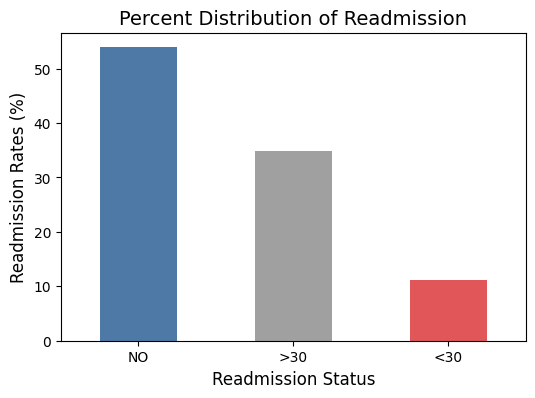

In [57]:
print("\nPercent distribution of the target variable (readmitted):")
readmission_rates = df['readmitted'].value_counts(normalize=True) * 100
print(readmission_rates)

# Percernt distribution of the target variable
plt.figure(figsize=(6, 4))
colors = {
    'NO': '#4E79A7',     # blue
    '>30': '#A0A0A0',    # gray
    '<30': '#E15759'     # muted red
}
readmission_rates.plot(kind='bar', color=[colors[c] for c in readmission_rates.index])

# Adding title and labels
plt.title('Percent Distribution of Readmission', fontsize=14)
plt.xlabel('Readmission Status', fontsize=12)
plt.ylabel('Readmission Rates (%)', fontsize=12)
plt.xticks(rotation=0)
plt.savefig('distribution_rate_readmission.png')

# Displaying the plot
plt.show()

Are there patients with multiple encounters contributing multiple rows?

In [58]:
df['patient_nbr'].value_counts().head()

patient_nbr
88785891    40
43140906    28
1660293     23
88227540    23
23199021    23
Name: count, dtype: int64

In [59]:
multi_encounter_rate = (
    df['patient_nbr'].value_counts() > 1
).mean() * 100

print(f"Patients with multiple encounters: {multi_encounter_rate:.2f}%")

Patients with multiple encounters: 23.45%


Are there differences by gender?

In [60]:
gender_readmission_rates = (
    df.groupby('gender')['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

gender_readmission_rates

readmitted,<30,>30,NO
gender,,,
Female,11.245156,35.676683,53.078160
Male,11.061524,34.060142,54.878334
Unknown/Invalid,0.000000,0.000000,100.000000


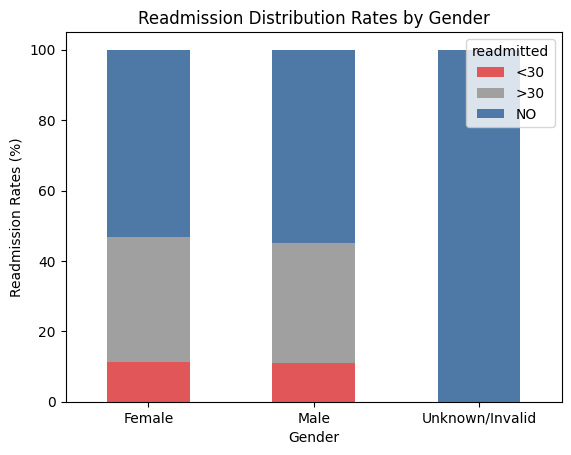

In [61]:
gender_readmission_rates.plot(kind='bar', stacked=True,
                           color=[colors[c] for c in gender_readmission_rates.columns])

plt.title("Readmission Distribution Rates by Gender")
plt.ylabel("Readmission Rates (%)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.savefig('distribution_rate_bygender.png')
plt.show()

How does readmission rate vary by age group?

In [62]:
age_rates = (
    df.groupby(['age'])['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

age_rates

readmitted,<30,>30,NO
age,,,
[0-10),1.863354,16.149068,81.987578
[10-20),5.788712,32.416787,61.794501
[20-30),14.242607,30.778515,54.978877
[30-40),11.231788,31.443709,57.324503
[40-50),10.604027,33.846154,55.549819
[50-60),9.666203,34.289522,56.044274
[60-70),11.128408,35.124316,53.747276
[70-80),11.773055,36.347246,51.879699
[80-90),12.083503,36.186544,51.729953


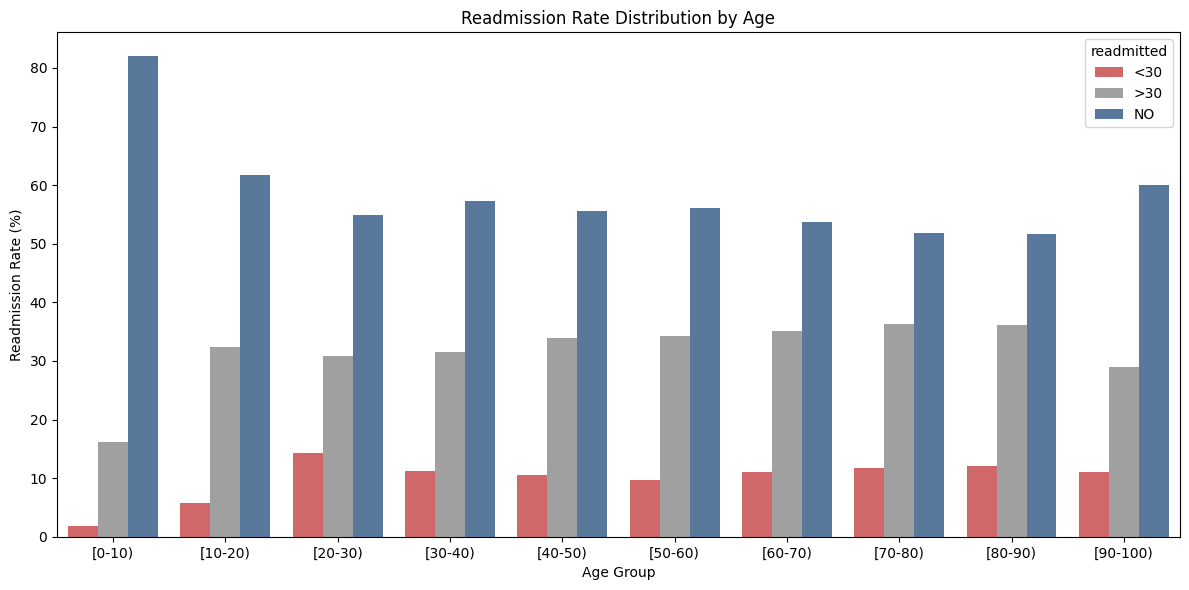

In [63]:
# Reshape the dataframe for plotting
age_rates_melted = age_rates.reset_index().melt(id_vars=['age'], var_name='readmitted', value_name='percentage')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='percentage', hue='readmitted', data=age_rates_melted, palette=colors)
plt.title('Readmission Rate Distribution by Age')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('distribution_rate_byage.png')
plt.show()

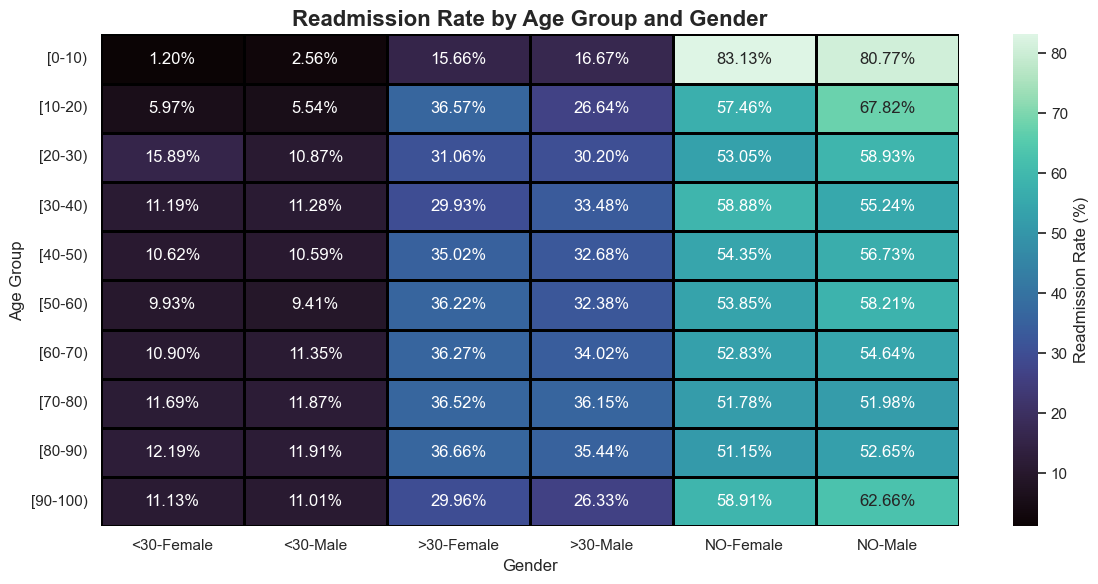

In [64]:
age_gender_rates = (
    df.groupby(['age', 'gender'])['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

# Filter valid genders
valid_genders = ['Male', 'Female']
age_gender_rates_filtered = age_gender_rates.reset_index()
age_gender_rates_filtered = age_gender_rates_filtered[age_gender_rates_filtered['gender'].isin(valid_genders)]

# Pivot the data for the heatmap
heatmap_data = age_gender_rates_filtered.pivot(index='age', columns='gender', values=['<30', '>30', 'NO'])

# Set a more advanced visual style
sns.set(style="whitegrid", palette="muted")

# Plot the heatmap with advanced customization
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='mako', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage

# Enhance the title and axis labels
plt.title('Readmission Rate by Age Group and Gender', fontsize=16, weight='bold')
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Gender', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='black')

# Adjust layout for better spacing
plt.tight_layout()

# Save configuration
plt.savefig('distribution_rate_byagegender.png')

# Show the plot
plt.show()

Are there differences by race/ethnicity?

In [65]:
age_race_rates = (
    df.groupby(['age','race'])['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

age_race_rates

readmitted                      <30        >30          NO
age      race                                             
[0-10)   AfricanAmerican   0.000000  31.250000   68.750000
         Asian             0.000000   0.000000  100.000000
         Caucasian         2.205882  15.441176   82.352941
         Hispanic          0.000000   0.000000  100.000000
         Other             0.000000   0.000000  100.000000
         Unknown           0.000000   0.000000  100.000000
[10-20)  AfricanAmerican   6.220096  33.014354   60.765550
         Asian             0.000000   0.000000  100.000000
         Caucasian         5.936073  34.018265   60.045662
         Hispanic          0.000000  13.043478   86.956522
         Other            10.000000  10.000000   80.000000
         Unknown           0.000000  22.222222   77.777778
[20-30)  AfricanAmerican  12.592593  30.740741   56.666667
         Asian             0.000000   0.000000  100.000000
         Caucasian        16.615385  31.589744   51.794872
         Hispanic          1.587302  26.984127   71.428571
         Other             3.703704  40.740741   55.555556
         Unknown           8.695652  17.391304   73.913043
[30-40)  AfricanAmerican  11.610793  31.234669   57.154538
         Asian             0.000000  26.666667   73.333333
         Caucasian        11.665910  32.546527   55.787562
         Hispanic          6.896552  26.436782   66.666667
         Other            13.095238  30.952381   55.952381
         Unknown           2.631579  15.789474   81.578947
[40-50)  AfricanAmerican  11.948332  34.122713   53.928956
         Asian             5.769231  19.230769   75.000000
         Caucasian        10.112543  34.741478   55.145979
         Hispanic         12.166172  32.344214   55.489614
         Other             7.594937  24.050633   68.354430
         Unknown           8.181818  18.181818   73.636364
[50-60)  AfricanAmerican   9.775148  35.100592   55.124260
         Asian             7.317073  25.203252   67.479675
         Caucasian         9.902831  34.904943   55.192226
         Hispanic          6.947891  29.032258   64.019851
         Other             7.766990  25.242718   66.990291
         Unknown           6.094183  21.329640   72.576177
[60-70)  AfricanAmerican  11.460302  35.586011   52.953686
         Asian            10.625000  26.250000   63.125000
         Caucasian        11.172348  35.517882   53.309771
         Hispanic         11.451943  35.787321   52.760736
         Other            11.111111  32.125604   56.763285
         Unknown           6.666667  22.626263   70.707071
[70-80)  AfricanAmerican  11.897275  35.298742   52.803983
         Asian            15.000000  25.555556   59.444444
         Caucasian        11.825057  37.002071   51.172872
         Hispanic         12.176166  33.419689   54.404145
         Other            10.736196  31.595092   57.668712
         Unknown           8.514190  28.046745   63.439065
[80-90)  AfricanAmerican  11.667584  35.002752   53.329664
         Asian            10.000000  27.777778   62.222222
         Caucasian        12.114779  36.768936   51.116285
         Hispanic         16.312057  28.368794   55.319149
         Other            10.000000  32.000000   58.000000
         Unknown          12.594458  26.448363   60.957179
[90-100) AfricanAmerican  10.144928  25.797101   64.057971
         Asian             0.000000  27.272727   72.727273
         Caucasian        11.311828  29.591398   59.096774
         Hispanic         21.052632  31.578947   47.368421
         Other             0.000000  33.333333   66.666667
         Unknown          11.594203  20.289855   68.115942

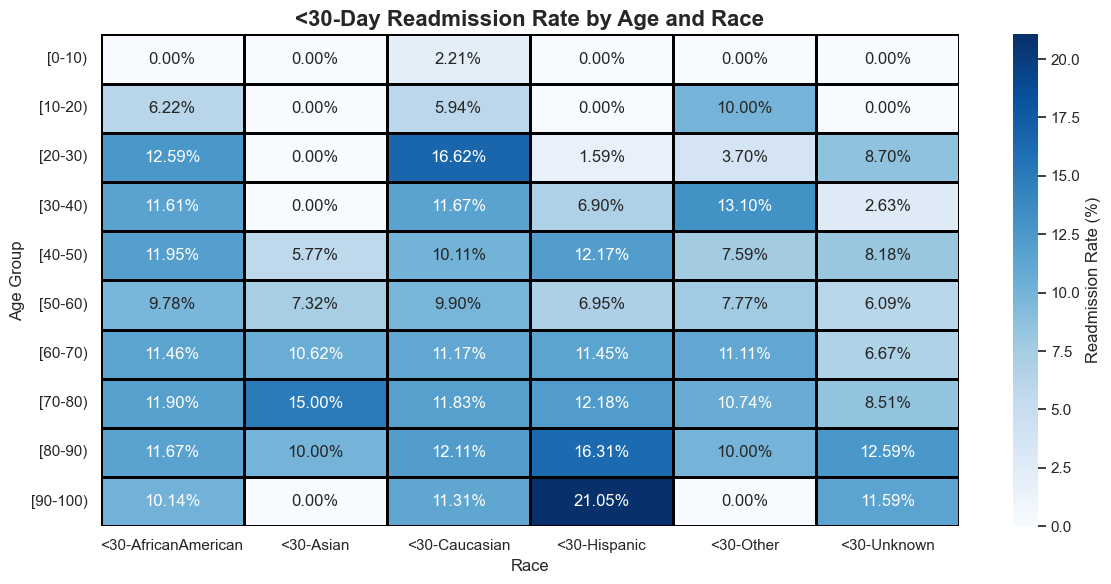

In [66]:
# Pivot the data for the heatmap
heatmap_data = age_race_rates[['<30']].reset_index().pivot(index='age', columns='race', values=['<30'])

# Set a more advanced visual style
sns.set(style="whitegrid", palette="muted")

# Plot the heatmap with advanced customization
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage

# Enhance the title and axis labels
plt.title('<30-Day Readmission Rate by Age and Race', fontsize=16, weight='bold')
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Race', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('distribution_rate_byagerace.png')

# Show the plot
plt.show()

Do payer categories show different readmission rates?

In [67]:
payer_code_rates = (
    df.groupby('payer_code')['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

payer_code_rates

readmitted,<30,>30,NO
payer_code,,,
BC,9.151450,27.948443,62.900107
CH,8.904110,22.602740,68.493151
CM,10.221993,34.124935,55.653072
CP,8.448480,30.833004,60.718516
DM,11.657559,40.072860,48.269581
FR,0.000000,0.000000,100.000000
HM,10.264584,36.978004,52.757412
MC,11.745122,36.937020,51.317858
MD,11.778029,35.645527,52.576444


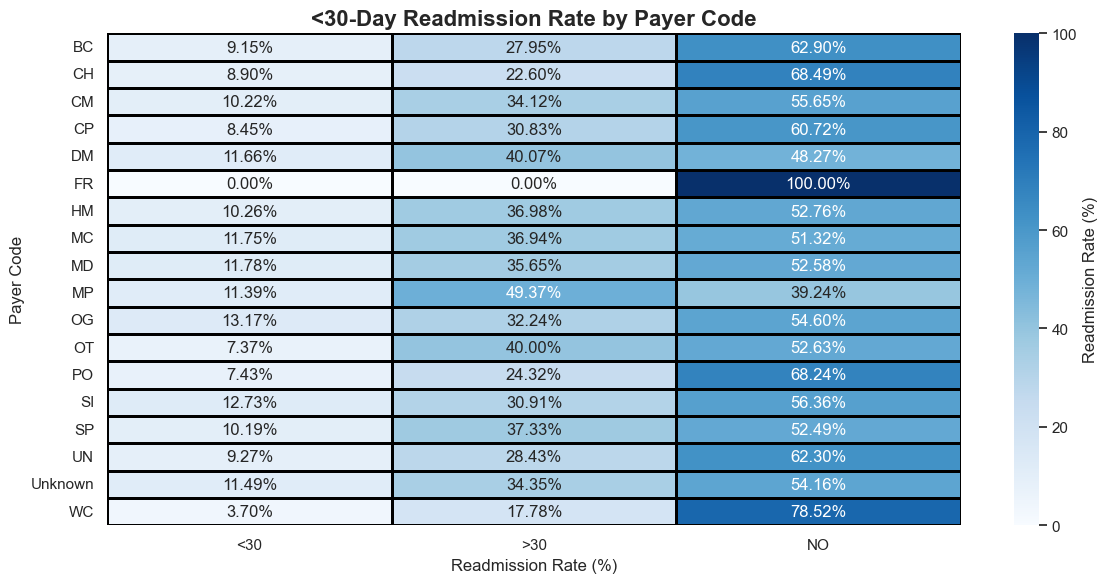

In [68]:
# Plot the heatmap with advanced customization
plt.figure(figsize=(12, 6))
ax = sns.heatmap(payer_code_rates, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage

# Enhance the title and axis labels
plt.title('<30-Day Readmission Rate by Payer Code', fontsize=16, weight='bold')
plt.ylabel('Payer Code', fontsize=12)
plt.xlabel('Readmission Rate (%)', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('distribution_rate_bypayercode.png')

# Show the plot
plt.show()

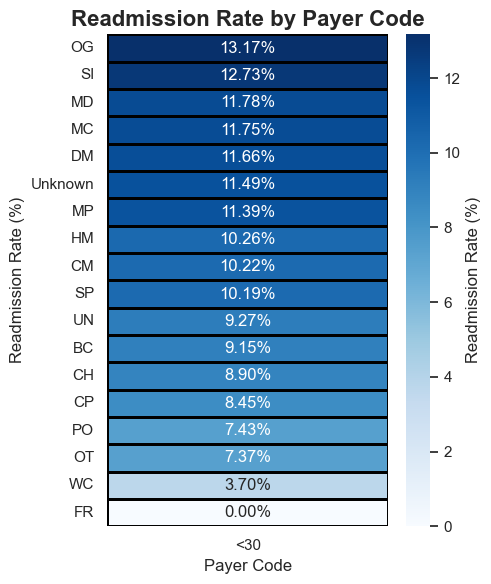

In [69]:
# Sort values in descending order
payer_code_rates_sorted = payer_code_rates.sort_values(by='<30', ascending=False)

# Plot the heatmap with advanced customization
plt.figure(figsize=(5, 6))
ax = sns.heatmap(payer_code_rates_sorted['<30'].to_frame(), annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage

# Enhance the title and axis labels
plt.title('Readmission Rate by Payer Code', fontsize=16, weight='bold')
plt.ylabel('Readmission Rate (%)', fontsize=12)
plt.xlabel('Payer Code', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('30day_distribution_rate_bypayercode.png')

# Show the plot
plt.show()

In [70]:
age_payer_code_rates = (
    df.groupby(['age', 'payer_code'])['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

age_payer_code_rates

readmitted                 <30        >30          NO
age      payer_code                                  
[0-10)   BC           0.000000   0.000000  100.000000
         CP           0.000000   0.000000  100.000000
         MD           0.000000  50.000000   50.000000
         SP           0.000000   0.000000  100.000000
         UN           0.000000   0.000000  100.000000
...                        ...        ...         ...
[90-100) OG          25.000000   0.000000   75.000000
         OT           0.000000  33.333333   66.666667
         SP          16.216216  45.945946   37.837838
         UN           5.714286   8.571429   85.714286
         Unknown      9.697733  27.204030   63.098237

[144 rows x 3 columns]

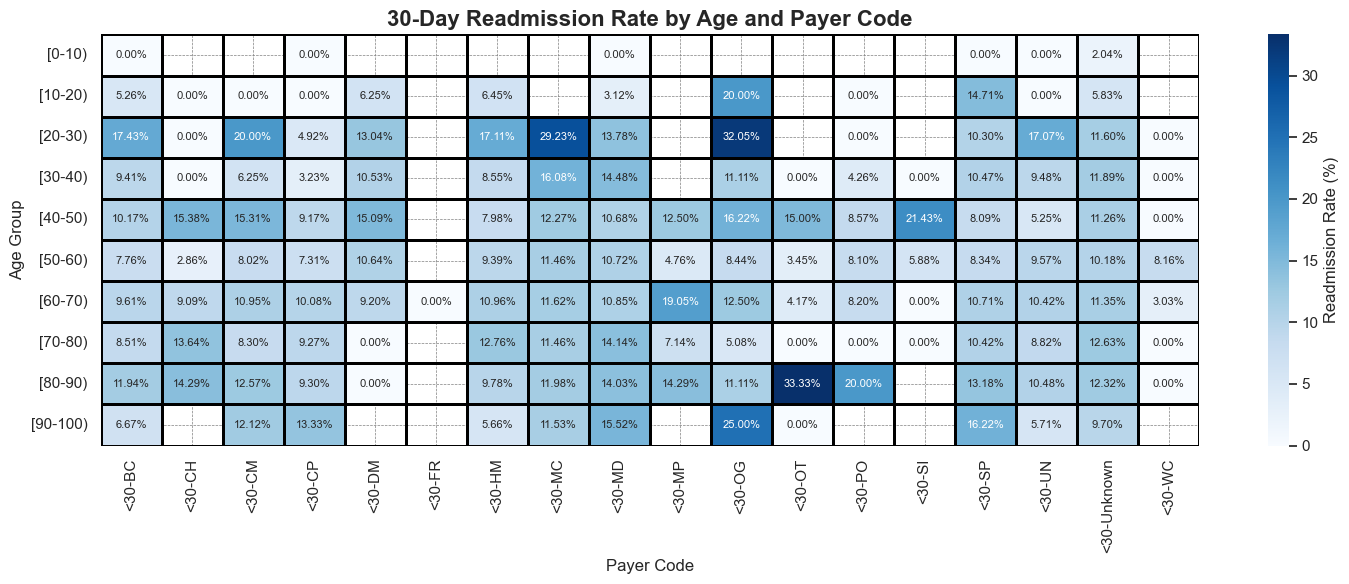

In [71]:
# Pivot the data for the heatmap
heatmap_data = age_payer_code_rates[['<30']].reset_index().pivot(index='age', columns='payer_code', values=['<30'])

# Set a more advanced visual style
sns.set(style="whitegrid", palette="muted")

# Plot the heatmap with advanced customization
plt.figure(figsize=(15, 6))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage
    text.set_fontsize(8)

# Enhance the title and axis labels
plt.title('30-Day Readmission Rate by Age and Payer Code', fontsize=16, weight='bold')
plt.ylabel('Age Group', fontsize=12)
plt.xlabel('Payer Code', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('30day_distribution_rate_byagepayercode.png')
# Show the plot
plt.show()

##### **Demographic Insights:**

**Total population**
  - **23.45%** of the total number of patients have multiple encounters.


**Gender Comparison**
  - Female and Male genders have almost the same <30-day hospital readmission rate (~11%)


**Age Comparison**
  - Sudden increase in <30-day hospitalreadmission rate from ages 10-20 (5.79%) to ages 20-30 (14.24%).
  - Gradual decrease in <30-day readmission rate from ages 20-30 (14.24%) to ages 50-60 (9.66%).
  - Ages 60 and above plateau to a <30-day readmission rate of ~11% with slight increase to 12% in ages 80-90.

**Age & Gender Comparison**
  - Separating age group into gender shows that the increase in ages 20-30 and 80-90 is largely due to Female increase hospital readmission.
    - 20-30: 15.89% for Female and 10.87% for Male
    - 80-90: 12.19% for Female and 11.91% for Male

**Age-Race Comparison**
  - All races have data record from all age groups that only 1 out of 4 races have <30-day hospital readmission per age group (Caucasian).
  - Though Hispanics at the age of 90-100 has the highest <30-day readmission rate of 21.05%, it does not significantly increase the overall age trend.

**Payer Code**
  - The top 5 highest <30-day hospital readmission rate by payer code (OG, SI, MD, MC, DM) are all under Government Insurance that represents the socioeconomically vulnerable populations like the elderly, the disabled and the low-income patients.

**Age & Payer Code Comparison**
  - 9 out of 17 payer code have a sudden increase in ages 20-30.
  - It can also be noted that MC (gov't insurance for low-income patients) only started to have a data record by the age 20-30

**Admission and Discharge Features EDA Questions:**

*To evaluate care pathways among readmitted cases without assuming causality*
- How does readmission vary by admission type (emergency vs elective)?
- Does admission source affect readmission?
- How does discharge disposition relate to readmission?

How does readmission vary by admission type (emergency vs elective)?

In [72]:
admission_type_rates = (
    df.groupby('admission_type_desc')['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

admission_type_rates

readmitted,<30,>30,NO
admission_type_desc,,,
Elective,10.392708,30.452064,59.155228
Emergency,11.522504,35.764030,52.713465
Newborn,10.000000,20.000000,70.000000
Not Available,10.344828,35.966562,53.688610
Not Mapped,8.437500,26.250000,65.312500
Trauma Center,0.000000,0.000000,100.000000
Unknown,11.075411,42.165942,46.758647
Urgent,11.179654,34.913420,53.906926


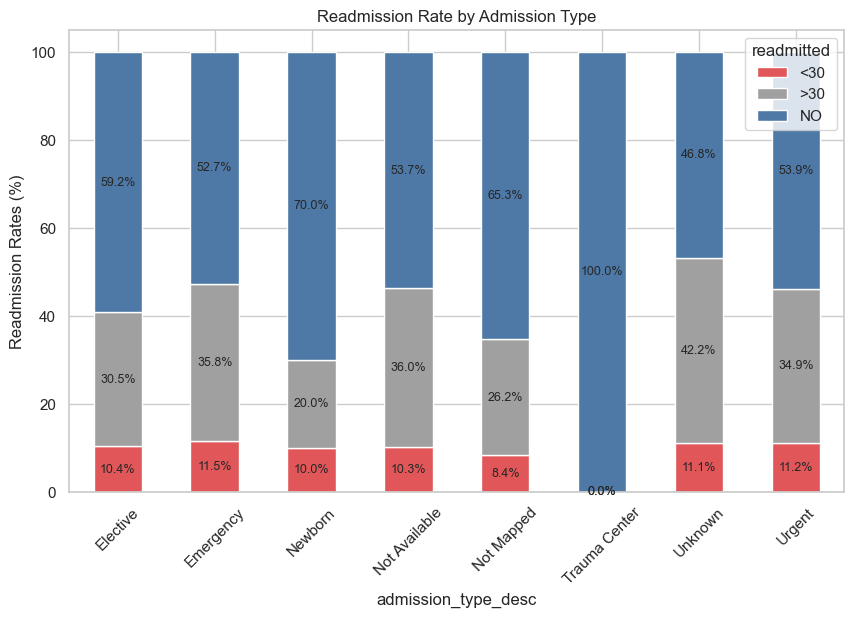

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))

admission_type_rates.plot(kind='bar', stacked=True, ax=ax, color=[colors[c] for c in admission_type_rates.columns])

ax.set_ylabel("Readmission Rates (%)")
ax.set_title("Readmission Rate by Admission Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add annotations in percentage format
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9)


plt.savefig('distribution_rate_byadmissionttype.png')
plt.show()

Does admission source affect readmission?

In [74]:
admission_source_rates = (
    df.groupby('admission_source_desc')['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

admission_source_rates

readmitted,<30,>30,NO
admission_source_desc,,,
Court/Law Enforcement,12.500000,25.000000,62.500000
Emergency Room,11.688176,37.685672,50.626152
Extramural Birth,0.000000,0.000000,100.000000
Not Available,10.400000,12.800000,76.800000
Not Mapped,13.664596,50.310559,36.024845
Physician Referral,10.586843,32.606122,56.807035
Sick Baby,0.000000,0.000000,100.000000
Transfer from Ambulatory Surgery Center,0.000000,0.000000,100.000000
Transfer from a Skilled Nursing Facility (SNF),11.812865,27.602339,60.584795


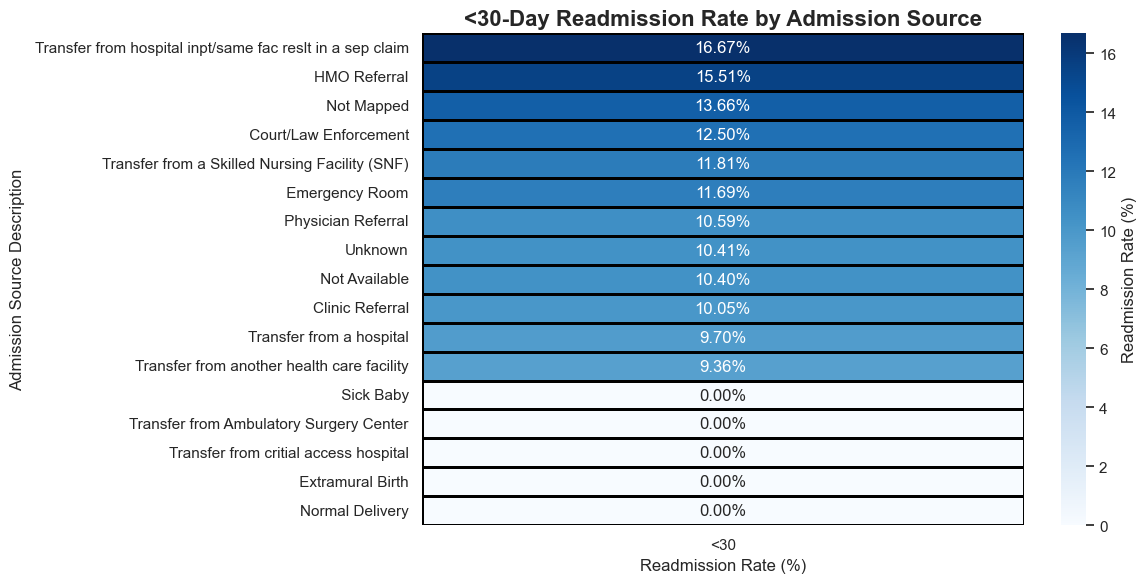

In [75]:
# Sort values in descending order
admission_source_rates_sorted = admission_source_rates.sort_values(by='<30', ascending=False)

# Plot the heatmap with advanced customization
plt.figure(figsize=(12, 6))
ax = sns.heatmap(admission_source_rates_sorted['<30'].to_frame(), annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage

# Enhance the title and axis labels
plt.title('<30-Day Readmission Rate by Admission Source', fontsize=16, weight='bold')
plt.ylabel('Admission Source Description', fontsize=12)
plt.xlabel('Readmission Rate (%)', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('distribution_rate_byadmissionsource.png')
# Show the plot
plt.show()

In [76]:
age_admission_source_rates = (
    df.groupby(['age', 'admission_source_desc'])['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

age_admission_source_rates

readmitted                                                   <30        >30  \
age      admission_source_desc                                                
[0-10)    Emergency Room                                0.917431  12.844037   
          Physician Referral                            2.631579  18.421053   
         Transfer from a hospital                       0.000000  40.000000   
         Unknown                                       25.000000  25.000000   
[10-20)   Emergency Room                                5.555556  33.333333   
...                                                          ...        ...   
[90-100)  Transfer from another health care facility    6.930693  14.851485   
         Clinic Referral                                0.000000  66.666667   
         HMO Referral                                 100.000000   0.000000   
         Transfer from a hospital                      13.043478  13.043478   
         Unknown                                        8.597285  26.244344   

readmitted                                                   NO  
age      admission_source_desc                                   
[0-10)    Emergency Room                              86.238532  
          Physician Referral                          78.947368  
         Transfer from a hospital                     60.000000  
         Unknown                                      50.000000  
[10-20)   Emergency Room                              61.111111  
...                                                         ...  
[90-100)  Transfer from another health care facility  78.217822  
         Clinic Referral                              33.333333  
         HMO Referral                                  0.000000  
         Transfer from a hospital                     73.913043  
         Unknown                                      65.158371  

[108 rows x 3 columns]

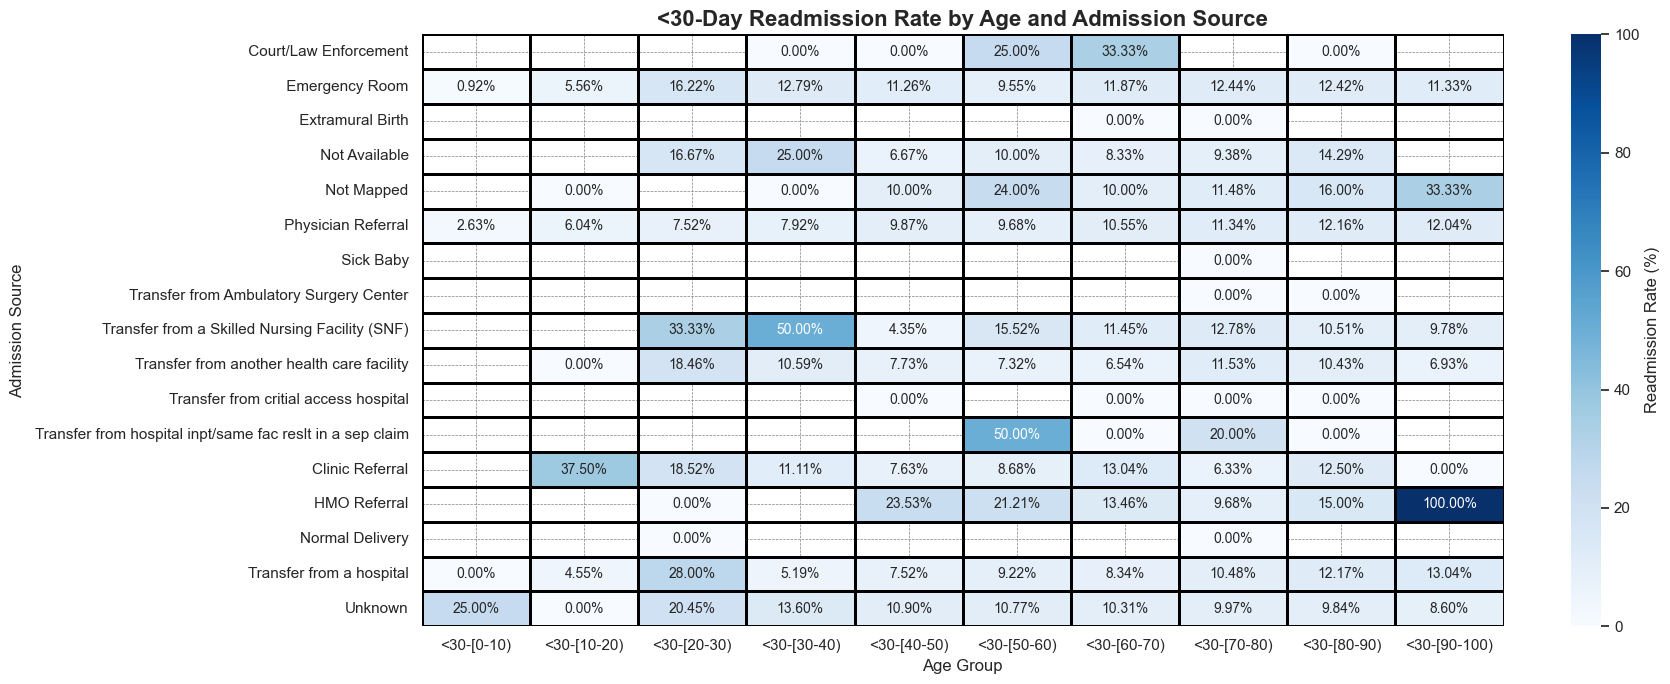

In [77]:
# Pivot the data for the heatmap
heatmap_data = age_admission_source_rates[['<30']].reset_index().pivot(index='admission_source_desc', columns='age', values=['<30'])

# Set a more advanced visual style
sns.set(style="whitegrid", palette="muted")

# Plot the heatmap with advanced customization
plt.figure(figsize=(18, 7))
ax = sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage
    text.set_fontsize(10)

# Enhance the title and axis labels
plt.title('<30-Day Readmission Rate by Age and Admission Source', fontsize=16, weight='bold')
plt.ylabel('Admission Source', fontsize=12)
plt.xlabel('Age Group', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('distribution_rate_byageadmissionsource.png')

# Show the plot
plt.show()

How does discharge disposition relate to readmission?

In [78]:
discharge_rates = (
    df.groupby('discharge_disposition_desc')['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

discharge_rates

readmitted,<30,>30,NO
discharge_disposition_desc,,,
Admitted as an inpatient to this hospital,42.857143,9.523810,47.619048
Discharged to home,9.300395,35.722350,54.977255
Discharged/transferred to ICF,12.760736,34.110429,53.128834
Discharged/transferred to SNF,14.662462,35.230042,50.107496
Discharged/transferred to a federal health care facility.,0.000000,20.000000,80.000000
Discharged/transferred to a long term care hospital.,7.281553,34.951456,57.766990
Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,14.583333,33.333333,52.083333
Discharged/transferred to another rehab fac including rehab units of a hospital .,27.696939,26.041144,46.261917
Discharged/transferred to another short term hospital,16.071429,31.390977,52.537594


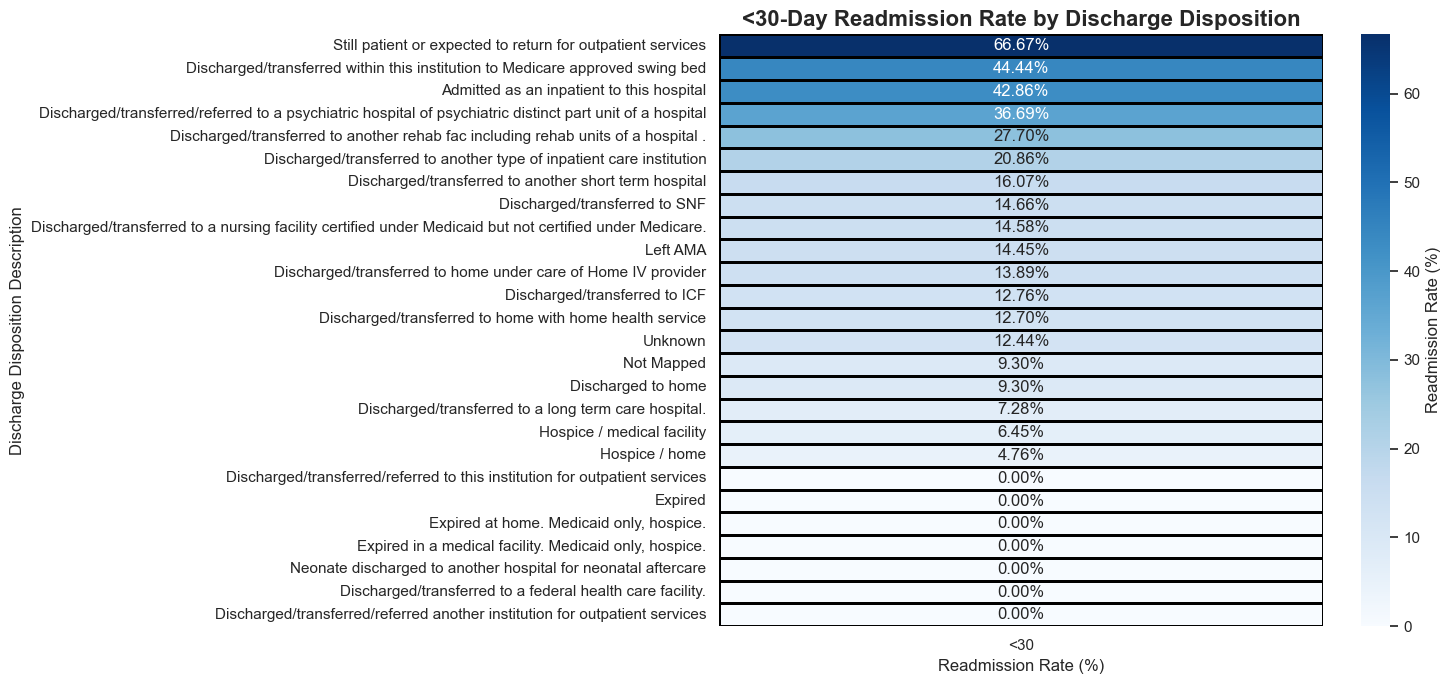

In [79]:
# Sort values in descending order
discharge_rates_sorted = discharge_rates.sort_values(by='<30', ascending=False)

# Plot the heatmap with advanced customization
plt.figure(figsize=(15, 7))
ax = sns.heatmap(discharge_rates_sorted['<30'].to_frame(), annot=True, fmt='.2f', cmap='Blues', cbar_kws={'label': 'Readmission Rate (%)'}, linewidths=0.8, linecolor='black')

# Add annotations in percentage format
for text in ax.texts:
    text.set_text(f'{float(text.get_text()):.2f}%')  # Formatting the annotation as percentage

# Enhance the title and axis labels
plt.title('<30-Day Readmission Rate by Discharge Disposition', fontsize=16, weight='bold')
plt.ylabel('Discharge Disposition Description', fontsize=12)
plt.xlabel('Readmission Rate (%)', fontsize=12)

# Add grid lines for better visibility of heatmap cells
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='black')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('distribution_rate_bydischarge.png')

# Show the plot
plt.show()

##### **Admission and Discharge Insights**

**Admission Type**
  - Highest <30-day hospital readmission rate for **Emergency** patients with 11.5% closely followed by **Urgent** patients with 11.2%
  - **Elective** admissions is at 10.4% readmission rate which I think is considered still close to **Emergency** rate.
  - This indicates that planned procedures does not generally mean low admission risk. Severity must still be a major factor.

**Admission Source**
  - Highest <30-day hospital readmission rate for **Transfer from hospital inpt/facility** patients with 16.67% closely followed by **HMO Referral** patients with 15.51%

**Discharge Disposition**
  - Highest <30-day hospital readmission rate for **Still patient or expected to return for outpatient services** with 66.67%

**Utilization & Severity Features EDA Questions:**

*To assess operational and healthcare in the year prior to admission*
- How does length of stay relate with readmission?
- How does prior utilization relate with readmission?

How does length of stay relate with readmission?

In [80]:
time_in_rates = (
    df.groupby('time_in_hospital')['readmitted']
      .value_counts(normalize=True)
      .unstack()        # columns = readmission categories
      .fillna(0) * 100
)

time_in_rates

readmitted,<30,>30,NO
time_in_hospital,,,
1,8.178491,31.468187,60.353322
2,9.939619,34.364840,55.695541
3,10.666817,34.270106,55.063077
4,11.806952,36.368860,51.824188
5,12.030905,35.982340,51.986755
6,12.587876,36.543308,50.868815
7,12.834955,36.234852,50.930193
8,14.233660,36.187657,49.578684
9,13.724184,36.608927,49.666889


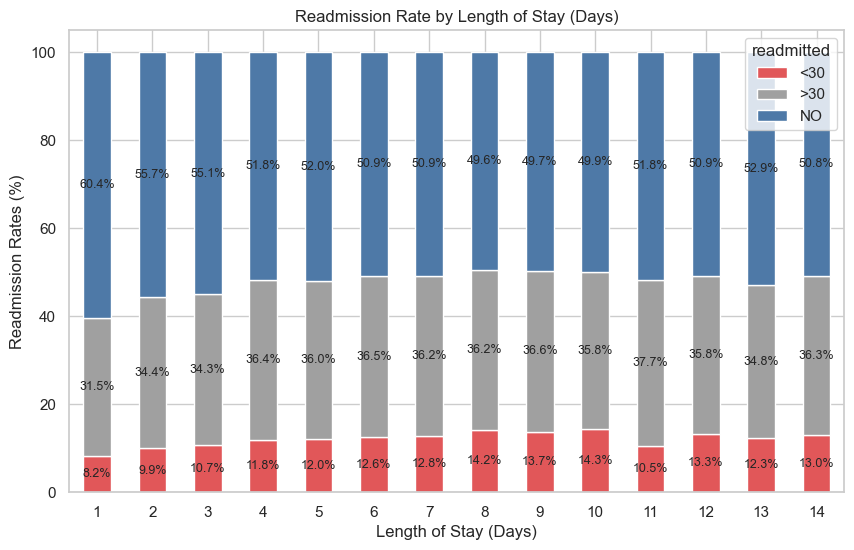

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))

time_in_rates.plot(kind='bar', stacked=True, ax=ax, color=[colors[c] for c in time_in_rates.columns])

ax.set_ylabel("Readmission Rates (%)")
ax.set_xlabel("Length of Stay (Days)")
ax.set_title("Readmission Rate by Length of Stay (Days)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add annotations in percentage format
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9)

plt.savefig('distribution_rate_bylos.png')
plt.show()

How does prior utilization relate to readmission?

In [82]:
prior_utilization_average = df.groupby('readmitted')[
    ['number_outpatient', 'number_emergency', 'number_inpatient']
].mean().reset_index()

prior_utilization_average

,readmitted,number_outpatient,number_emergency,number_inpatient
0,<30,0.436911,0.357313,1.224003
1,>30,0.496329,0.283669,0.838993
2,NO,0.273112,0.109216,0.381963


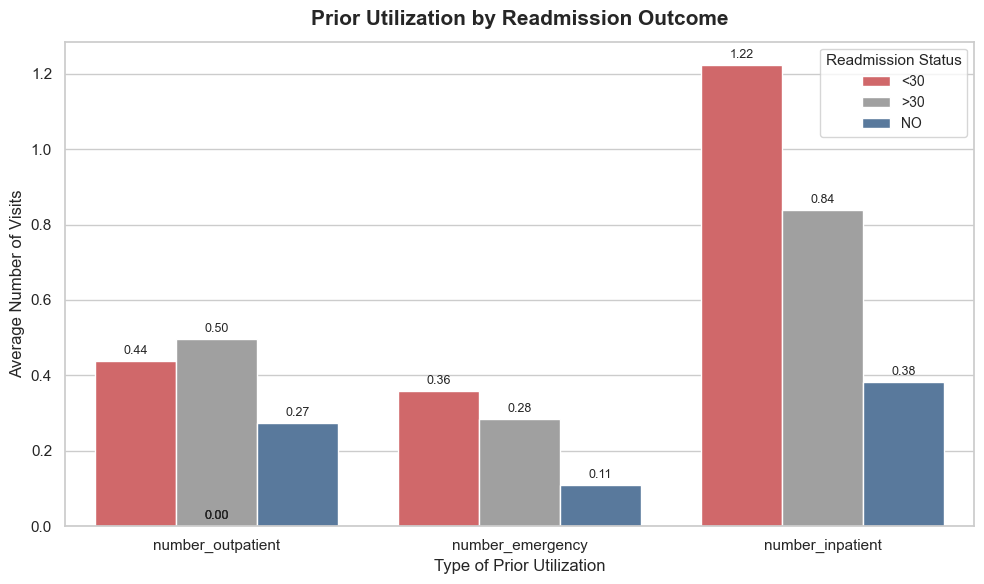

In [83]:
# Convert to long format for plotting
util_long = prior_utilization_average.melt(id_vars='readmitted', var_name='Utilization Type', value_name='Average Count')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=util_long, x='Utilization Type', y='Average Count', hue='readmitted', palette=colors)

# Improve labels
ax.set_title('Prior Utilization by Readmission Outcome', fontsize=15, weight='bold', pad=12)
ax.set_xlabel('Type of Prior Utilization')
ax.set_ylabel('Average Number of Visits')
ax.legend(title='Readmission Status', title_fontsize=11, fontsize=10, loc='upper right')

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
        ha='center',va='bottom',fontsize=9,xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.savefig('distribution_rate_byutilization.png')
plt.show()

##### **Utilization & Severity Insights:**

**Length of Stay**
  - Gradual <30-day readmission rate increase as length of stay also increases starting from 1 day with 8.2% up to 7days with 12.8% readmission.
  - Sudden increase of <30-day readmission rate after 7 days ranging from 13-14%.
  
**Prior Utilization**
  - Highest <30-day hospital readmission average number of visits for `num_inpatients` with 1.22 average followed by `num_outpatients` with 0.44 average.

**Diagnoses and Comorbidity Features EDA Questions:**

*To assess diagnosis data and highlight the need for clinically meaningful abstraction*
- Which diagnosis codes are most frequent?
- Are certain diagnosis groups overrepresented among readmitted cases?
- Do chronic conditions cluster together?
- Does comorbidity count increase readmission risk?

Which diagnosis codes are most frequent?

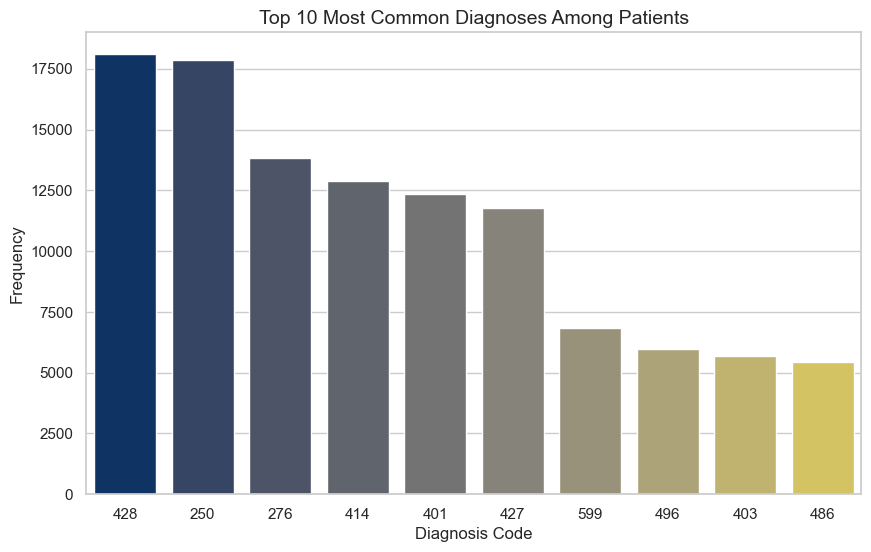

In [84]:
# Combine the three diagnosis columns
diagnosis_combined = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']])

# Count the frequency of each diagnosis code
diagnosis_counts = diagnosis_combined.value_counts()

# Get the top 10 most common diagnoses
top_10_diagnoses = diagnosis_counts.head(10)

# Set up the plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_diagnoses.index, y=top_10_diagnoses.values, palette="cividis")

# Adding titles and labels
plt.title("Top 10 Most Common Diagnoses Among Patients", fontsize=14)
plt.xlabel("Diagnosis Code", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.savefig('top10_diagnosis_code.png')
plt.show()

Are certain diagnosis groups overrepresented among readmitted cases?

In [85]:
diag_readmit = (
    df.groupby('diag_1')['readmitted']
      .value_counts()
      .unstack()
      .fillna(0)
      .sort_values(by='<30', ascending=False)
      .head(10)
)

diag_readmit

readmitted,<30,>30,NO
diag_1,,,
428,968.0,3089.0,2805.0
414,595.0,2125.0,3861.0
410,373.0,1065.0,2176.0
434,329.0,588.0,1111.0
486,314.0,1369.0,1825.0
786,291.0,1418.0,2307.0
491,287.0,1073.0,915.0
996,264.0,771.0,932.0
276,257.0,713.0,919.0


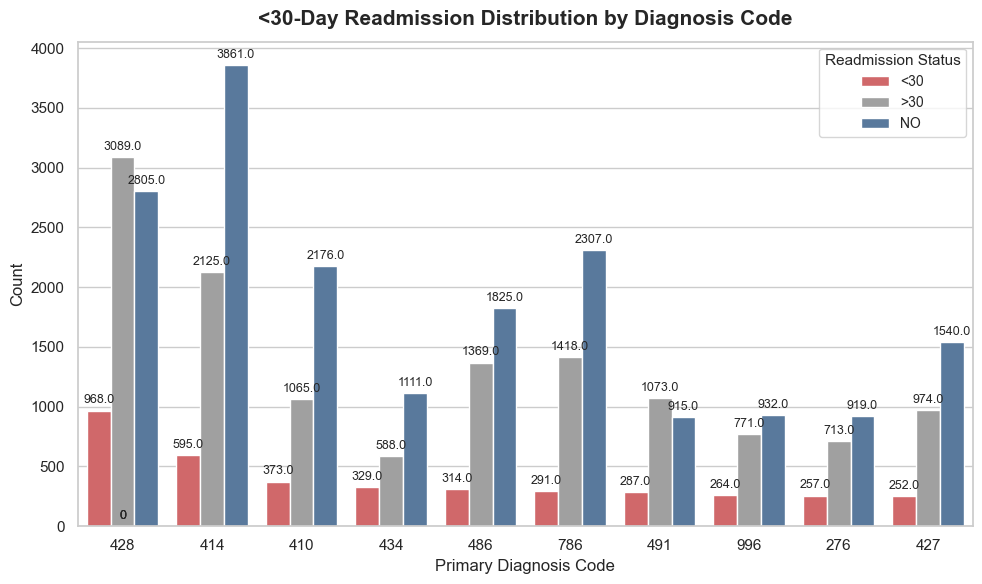

In [86]:
# Convert to long format for plotting
diag_readmit_long = diag_readmit.reset_index().melt(id_vars='diag_1', var_name='Readmission', value_name='Count')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=diag_readmit_long, x='diag_1', y='Count', hue='Readmission', palette=colors)

# Improve labels
ax.set_title('<30-Day Readmission Distribution by Diagnosis Code', fontsize=15, weight='bold', pad=12)
ax.set_xlabel('Primary Diagnosis Code')
ax.set_ylabel('Count')
ax.legend(title='Readmission Status', title_fontsize=11, fontsize=10, loc='upper right')

# Annotate bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
        ha='center',va='bottom',fontsize=9,xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.savefig('distribution_rate_bydiagreadmit.png')
plt.show()

Do chronic conditions cluster together?

In [87]:
# Filter out rows where readmitted is '<30'
df_readmit30 = df[df['readmitted'] == '<30']

# Function to categorize comorbidities based on ICD-9 codes
def categorize_disease(diag_code):
    if pd.isna(diag_code):
        return "None"
    code = str(diag_code)
    if code.startswith('250'):
        return "Diabetes"
    elif code.startswith(('401', '402', '403', '404', '405')):
        return "Hypertension"
    elif code.startswith(('410', '411', '412', '413', '414', '428')):
        return "Heart Disease"
    elif code.startswith(('580', '581', '582', '583', '584', '585', '586', '587', '588', '589')):
        return "Kidney Disease"
    elif code.startswith(('460', '461', '462', '463', '464', '465', '466', '490', '491', '492', '493', '494', '495', '496', '497', '498', '499', '500', '501', '502', '503', '504', '505', '506', '507', '508', '509', '510', '511', '512', '513', '514', '515', '516', '517', '518', '519')):
        return "Respiratory Disease"
    else:
        return "Other"

# Apply the function to all diagnosis columns
comorbidity_1 = df_readmit30['diag_1'].apply(categorize_disease)
comorbidity_2 = df_readmit30['diag_2'].apply(categorize_disease)
comorbidity_3 = df_readmit30['diag_3'].apply(categorize_disease)

# Merge comorbidities into a single column
dummies = (
    pd.concat([comorbidity_1, comorbidity_2, comorbidity_3], axis=1)
      .apply(lambda x: pd.Series(1, index=set(x) - {'None'}), axis=1)
      .fillna(0)
)

dummies.head()

,Diabetes,Heart Disease,Hypertension,Kidney Disease,Other,Respiratory Disease
11,0.0,0.0,0.0,0.0,1.0,0.0
12,1.0,1.0,0.0,0.0,0.0,0.0
16,0.0,1.0,0.0,0.0,0.0,0.0
46,1.0,1.0,0.0,0.0,1.0,0.0
50,0.0,0.0,0.0,0.0,1.0,0.0


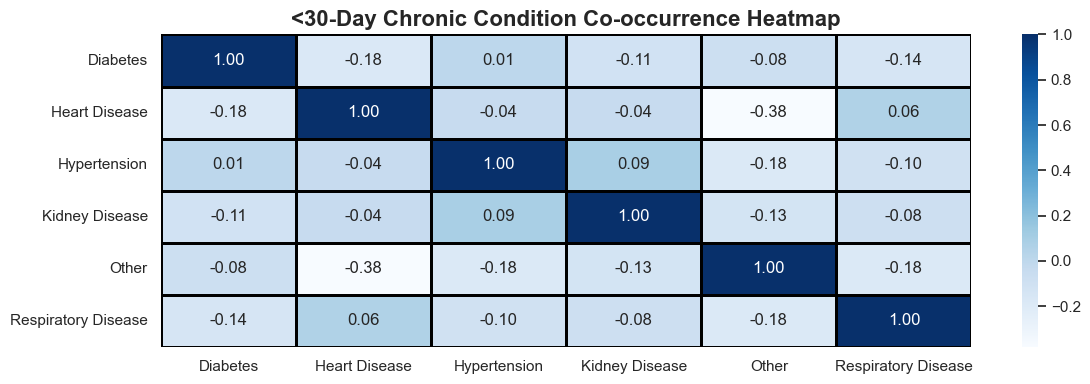

In [88]:
# Plot the heatmap with
plt.figure(figsize=(12, 4))
sns.heatmap(dummies.corr(), annot=True, cmap='Blues', fmt='.2f',linewidths=0.8, linecolor='black')

plt.title('<30-Day Chronic Condition Co-occurrence Heatmap', fontsize=16, weight='bold')
plt.savefig('distribution_rate_bydiagreadmit.png')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('chronic_condition_heatmap.png')
plt.show()

Does comorbidity count increase readmission risk?

In [89]:
comorbidity_group_rates = (
    df.groupby(pd.cut(df['number_diagnoses'],
                      bins=[0, 3, 6, 9, 15],
                      labels=['Low', 'Moderate', 'High', 'Very High']
                      )
                )['readmitted']
                .value_counts(normalize=True)
                .unstack()
                .fillna(0) * 100
)

comorbidity_group_rates

readmitted,<30,>30,NO
number_diagnoses,,,
Low,6.965906,26.391955,66.642139
Moderate,9.442250,29.526411,61.031339
High,12.056808,37.499823,50.443369
Very High,18.571429,35.714286,45.714286


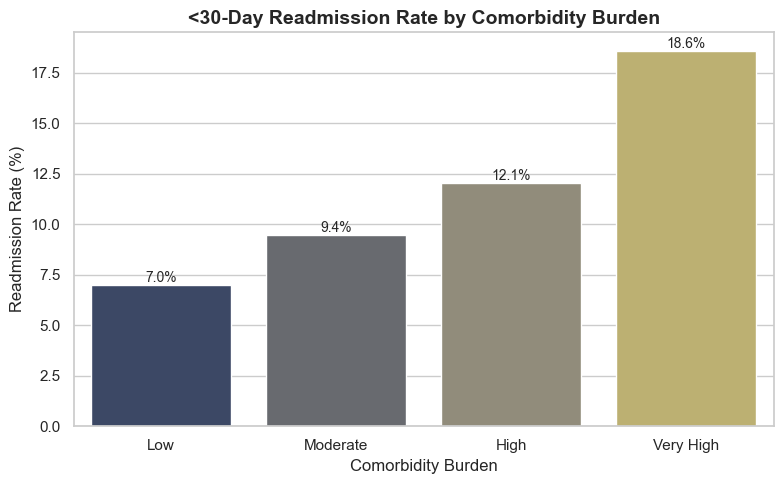

In [90]:
comorbidity_group_30 = (
    df.groupby(
        pd.cut(
            df['number_diagnoses'],
            bins=[0, 3, 6, 9, 15],
            labels=['Low', 'Moderate', 'High', 'Very High']
        )
    )['readmitted']
    .apply(lambda x: (x == '<30').mean() * 100)
    .reset_index(name='Readmission Rate (%)')
)

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=comorbidity_group_30,
    x='number_diagnoses',
    y='Readmission Rate (%)',
    palette='cividis'
)

ax.set_title('<30-Day Readmission Rate by Comorbidity Burden', fontsize=14, weight='bold')
ax.set_xlabel('Comorbidity Burden')
ax.set_ylabel('Readmission Rate (%)')

# Annotate bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.1f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.savefig('distribution_rate_bycomorbidity_burden.png')
plt.show()

##### **Diagnosis and Comorbidity Insights:**

**Diagnosis Code**
  - Highest frequency of diagnosis for 428 representing heart failure followed by diabetes.
  - In terms of <30-day hospital readmission count per diagnosis code, **heart failure** is still the highest with 968 counts followed by **other ischemic heart disease** with 595 counts.

**Chronic Condition Correlation**
  - None of the chronic condition pair exceeds |0.7| indicating each chronic condition captures a different aspect of patient risk.

**Comorbidity Burden**
  - Logarithmic increase for <30-day readmission rate as `numb_diagnoses` also increases.

**Medication Usage Features EDA Questions:**

*To understand the differences between insulin and oral agent usage*
- How often are diabetes medications used?


How often are diabetes medications used?

In [91]:
diabetes_meds = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'insulin'
]

med_usage_rate = (
    (df_readmit30[diabetes_meds] != 'No').mean() * 100
).sort_values(ascending=False)

med_usage_rate = (
    df.groupby
)

med_usage_rate

<bound method DataFrame.groupby of         encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        time_in_hospital payer_code         medical_specialty  \
0                      1    Unknown  Pediatrics

In [92]:
med_usage_by_readmit = (
    df.groupby('readmitted')[diabetes_meds]
                 .apply(lambda x: (x != 'No').mean() * 100)
).T

med_usage_by_readmit

readmitted,<30,>30,NO
metformin,17.073171,18.866226,20.674759
repaglinide,1.805054,1.800535,1.264946
nateglinide,0.704411,0.737094,0.657991
chlorpropamide,0.044026,0.095653,0.085666
glimepiride,4.666725,5.365030,5.019685
acetohexamide,0.000000,0.002813,0.000000
glipizide,12.785066,13.307076,11.854768
glyburide,9.967421,10.459980,10.571595
tolbutamide,0.008805,0.019693,0.027340
pioglitazone,6.815180,7.756365,6.920749


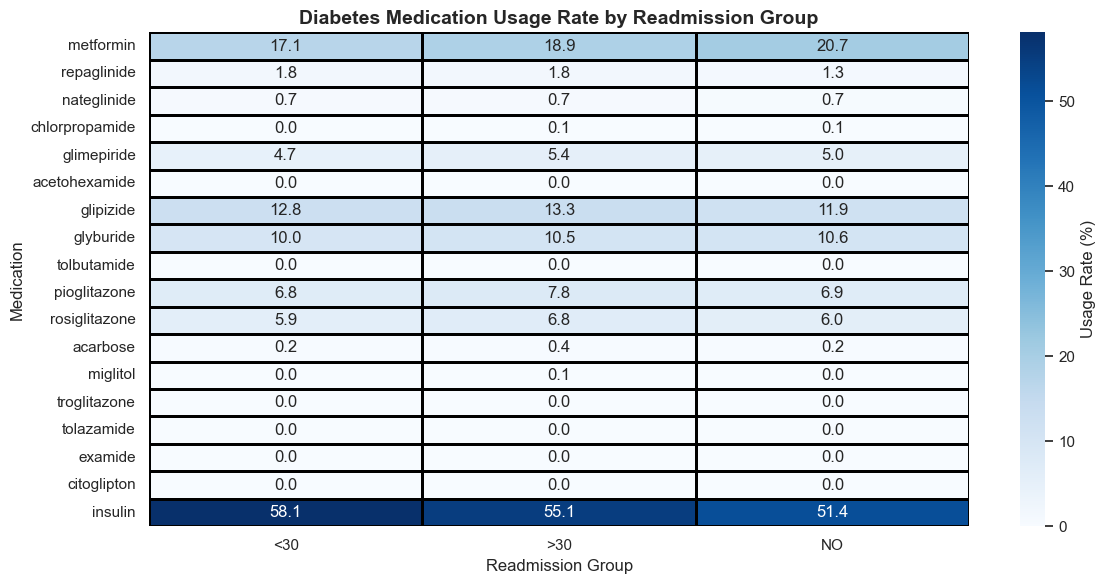

In [140]:
plt.figure(figsize=(12, 6))

# Heatmap: readmission group = rows, medications = columns
sns.heatmap(
    med_usage_by_readmit,
    annot=True,         # show numbers
    fmt=".1f",          # one decimal place
    cmap="Blues",      # color palette
    cbar_kws={'label': 'Usage Rate (%)'},
    linewidths=0.8,
    linecolor='black'
)

plt.title('Diabetes Medication Usage Rate by Readmission Group', fontsize=14, weight='bold')
plt.xlabel('Readmission Group')
plt.ylabel('Medication')
plt.yticks(rotation=0)  # keep row labels horizontal
plt.tight_layout()
plt.savefig('medication_usage_rate_byreadmission.png')
plt.show()

##### **Medication Usage Insights:**

**Diabetes Medication Usage**
  - Insulin usage was most prevalent among patients readmitted within 30 days (58.1%) and lowest among those without readmission (51.4%), suggesting that insulin use serves as a proxy for diabetes severity and higher clinical complexity.
  - In contrast, metformin use was more common in non-readmitted patients, consistent with its role as a first-line therapy in less severe disease.
  - Other oral antidiabetic agents demonstrated relatively similar usage patterns across readmission groups

#### **4. Feature Engineering**
*In alignment with CMS-style readmission metrics, this part transformed raw variables into representations that are domain-specific, meaningful, and usable by models*

In [94]:
# Make a copy of the original data without any modifications or preprocessing
df_original = df.copy()

Check and remove duplicates

In [95]:
# Check for duplicate records in the dataset
duplicates = df.duplicated().sum()

print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


Drop unnecessary columns
- `encounter_id`and `patient_nbr` columns are unique identifiers.
- Even if 23.45% of `patient_nbr` have multiple encounters, the corresponding multiple `encounter_id` per `patient_nbr` does not represent the sequence or duration in between readmission.
- `encounder_id` is also not a good data to do seasonality analysis since there is a possibility that `encounter_id` ordering is not chronological ordering.
- In terms of CMS-style readmission, they only evaluate the current encounter and outcome thus the said two columns may be dropped.

In [96]:
df = df.drop(columns=['encounter_id', 'patient_nbr'])

##### **Processing Age of Patients**

*Since the `age` column contains categorical age ranges (e.g., '[0-10)', '[10-20)'), these categories were mapped to their respective average values using a dictionary. After the mapping, the average age of patients were calculated in the dataset using the `.mean()` method.*


In [97]:
# Function to extract the midpoint from age ranges
def get_age_midpoint(age_range):
    lower, upper = age_range.strip('[]').split('-')
    return (int(lower) + int(upper.replace(')', ''))) / 2

# Apply the function to the 'age' column
df['age_group_average'] = df['age'].apply(get_age_midpoint)

# Now calculate the average age
average_age = df['age_group_average'].mean()

##### **Processing Length of Stay**

*The `time_in_hospital` column contains numerical feature from 1 to 14 days. Two additional features will be created where one feature is the binary "long stay" flag since EDA shows risk increase after 7 days. The other feature column is a simple categorical bin for easier SHAP interpretation.*

In [98]:
df['long_stay_flag'] = (df['time_in_hospital'] >= 7).astype(int)

df['los_group_ord'] = pd.cut(
    df['time_in_hospital'],
    bins=[0, 3, 7, 10, 14],
    labels=[0, 1, 2, 3] # encoded numerically to preserve ordering
).astype(int)

##### **Processing Payer Code**

*The `payer_code` column contains 18 different categories of insurance payer. These will be grouped into standard healthcare payer categories to ensure reproducibility and alignment with established health services.*

In [99]:
payer_map = {
    'MC': 'Medicare',
    'MD': 'Medicaid',
    'MP': 'Medicare',
    'BC': 'Private',
    'HM': 'Private',
    'CP': 'Private',
    'SI': 'Self-pay',
    'UN': 'Uninsured',
    'SP': 'Self-pay',
    'CH': 'CHIP',
    'WC': 'Workers Comp',
    'DM': 'Disability',
    'OG': 'Other',
    'OT': 'Other',
    'PO': 'Other',
    'FR': 'Other',
    'CM': 'Other',
    'Unknown': 'Unknown'
}

df['payer_group'] = df['payer_code'].map(payer_map)

##### **Processing Diagnosis Code**

*`diag_1`, `diag_2`, and `diag_3` will be grouped into clinical categories to reduce dimensionality and prevent overfitting. Chronic disease indicators and comorbidity count will be created to capture disease burden that influences readmission risk.*

In [100]:
# Apply the categorize_disease function to all diagnosis columns
comorbidity_1 = df['diag_1'].apply(categorize_disease)
comorbidity_2 = df['diag_2'].apply(categorize_disease)
comorbidity_3 = df['diag_3'].apply(categorize_disease)

# Merge comorbidities into a single column
dummies = (
    pd.concat([comorbidity_1, comorbidity_2, comorbidity_3], axis=1)
      .apply(lambda x: pd.Series(1, index=set(x) - {'None'}), axis=1)
      .fillna(0)
)

# Concatenate dummies with main dataset
df = pd.concat([df, dummies], axis=1)

In [101]:
# Create comorbidity count
chronic_cols = [
    'Diabetes',
    'Heart Disease',
    'Hypertension',
    'Kidney Disease',
    'Other',
    'Respiratory Disease'
]

df['comorbidity_count'] = df[chronic_cols].sum(axis=1)

##### **Processing Admission and Discharge**

*`admission_type_desc`, `admission_source_desc`, and `discharge_disposition_desc` columns will be transformed into binary indicators capturing emergency, care transitions, and post-discharge dependency to reduce categorical noise.*

In [102]:
# For admission type
df['is_emergency_admission'] = (df['admission_type_desc'].str.contains('Emergency', case=False, na=False).astype(int))
df['is_elective_admission'] = (df['admission_type_desc'].str.contains('Elective', case=False, na=False).astype(int))

# For admission source
df['is_transfer_in'] = (df['admission_source_desc'].str.contains('transfer|hospital|nursing|snf|rehab',case=False, na=False).astype(int))
df['from_community'] = (df['admission_source_desc'].str.contains('home|physician|clinic',case=False, na=False).astype(int))

# For handling rare / noisy categories
rare_admission_sources = ['Not Mapped', 'Unknown', 'NULL']

df['admission_source_other'] = (df['admission_source_desc'].isin(rare_admission_sources)).astype(int)

# For discharge disposition
df['discharged_home'] = (df['discharge_disposition_desc'].str.contains('home',case=False, na=False).astype(int))

df['discharged_to_facility'] = (df['discharge_disposition_desc'].str
                                .contains('snf|nursing|rehab|ltac|long term|icare|facility',case=False, na=False).astype(int))

df['discharged_hospice_or_expired'] = (df['discharge_disposition_desc'].str.contains('hospice|expired',case=False, na=False).astype(int))


In [103]:
# Keep an untouched copy for reference
df_preprocessed = df.copy()

# Save as CSV
df_preprocessed.to_csv("preprocessed_data.csv", index=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 64 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   race                           101766 non-null  object 
 1   gender                         101766 non-null  object 
 2   age                            101766 non-null  object 
 3   time_in_hospital               101766 non-null  int64  
 4   payer_code                     101766 non-null  object 
 5   medical_specialty              101766 non-null  object 
 6   num_lab_procedures             101766 non-null  int64  
 7   num_procedures                 101766 non-null  int64  
 8   num_medications                101766 non-null  int64  
 9   number_outpatient              101766 non-null  int64  
 10  number_emergency               101766 non-null  int64  
 11  number_inpatient               101766 non-null  int64  
 12  diag_1                        

#### **5. Feature Selection**

*This part of the project used filter-based approach to identify features statistically associated with 30-day readmission while remaining model-agnostic, reducing overfitting and improving interpretability.*


In [104]:
# Identify object (categorical) columns
numerical_columns = df.select_dtypes(include=['int64', 'int32', 'float64',]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(f'The categorical features are:\n\n {categorical_columns}')

The categorical features are:

 Index(['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1',
       'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type_desc', 'discharge_disposition_desc',
       'admission_source_desc', 'payer_group'],
      dtype='object')


In [105]:
# Drop columns with feature engineered data to reduce redundancy
df = df.drop(columns=['age', 'time_in_hospital', 'payer_code', 'diag_1',
                      'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide',
                      'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
                      'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                      'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                      'insulin', 'glyburide-metformin', 'glipizide-metformin',
                      'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                      'metformin-pioglitazone', 'admission_type_desc', 'discharge_disposition_desc',
                      'admission_source_desc'], errors='ignore')

##### **Chi-square test** for filtering categorical columns

*Since the dataset is high-dimensional and dominated by categorical features, chi-square filter approach is used because it can efficiently evaluates the statistical association between each categorical feature and readmission outcoome independently.*

In [106]:
# Define a function that returns a table, a chi-square value, and a p value
def chisquare_test(df, var_list, target, null_list=[]):
    for var in var_list:
        print(var.upper())
        chi_test = pd.crosstab(df[var], df[target])
        display(chi_test)

        chisq_value, pvalue, dataframe, expected = chi2_contingency(chi_test)

        print(
            f"""Chi-square value : {chisq_value:.2f}
p-value          : {pvalue:.4f}\n""")

        if pvalue > 0.01: # adds variables that fail to reject the null hypothesis
            null_list.append(var)

    print(f'Fail to reject null hypothesis: {null_list}')

In [107]:
categorical_columns = df.select_dtypes(include=['object']).columns

null_list=[]
chisquare_test(df, categorical_columns, 'readmitted',null_list)

RACE


readmitted,<30,>30,NO
race,,,
AfricanAmerican,2155,6634,10421
Asian,65,161,415
Caucasian,8592,27124,40383
Hispanic,212,642,1183
Other,145,446,915
Unknown,188,538,1547


Chi-square value : 282.59
p-value          : 0.0000

GENDER


readmitted,<30,>30,NO
gender,,,
Female,6152,19518,29038
Male,5205,16027,25823
Unknown/Invalid,0,0,3


Chi-square value : 37.46
p-value          : 0.0000

MEDICAL_SPECIALTY


readmitted,<30,>30,NO
medical_specialty,,,
AllergyandImmunology,3,3,1
Anesthesiology,1,3,8
Anesthesiology-Pediatric,1,5,13
Cardiology,425,1853,3074
Cardiology-Pediatric,1,4,2
...,...,...,...
Surgery-Thoracic,11,30,68
Surgery-Vascular,74,200,259
SurgicalSpecialty,2,9,22


Chi-square value : 1354.56
p-value          : 0.0000

CHANGE


readmitted,<30,>30,NO
change,,,
Ch,5558,17272,24181
No,5799,18273,30683


Chi-square value : 215.83
p-value          : 0.0000

DIABETESMED


readmitted,<30,>30,NO
diabetesMed,,,
No,2246,7227,13930
Yes,9111,28318,40934


Chi-square value : 386.51
p-value          : 0.0000

READMITTED


readmitted,<30,>30,NO
readmitted,,,
<30,11357,0,0
>30,0,35545,0
NO,0,0,54864


Chi-square value : 203532.00
p-value          : 0.0000

PAYER_GROUP


readmitted,<30,>30,NO
payer_group,,,
CHIP,13,33,100
Disability,64,220,265
Medicaid,416,1259,1857
Medicare,3819,12021,16678
Other,385,1176,2097
Private,1284,4402,7776
Self-pay,517,1886,2659
Uninsured,227,696,1525
Unknown,4627,13828,21801


Chi-square value : 343.20
p-value          : 0.0000

Fail to reject null hypothesis: []


In [108]:
# Drop columns that do not pass the p-value test
df = df.drop(columns=null_list)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   race                           101766 non-null  object 
 1   gender                         101766 non-null  object 
 2   medical_specialty              101766 non-null  object 
 3   num_lab_procedures             101766 non-null  int64  
 4   num_procedures                 101766 non-null  int64  
 5   num_medications                101766 non-null  int64  
 6   number_outpatient              101766 non-null  int64  
 7   number_emergency               101766 non-null  int64  
 8   number_inpatient               101766 non-null  int64  
 9   number_diagnoses               101766 non-null  int64  
 10  change                         101766 non-null  object 
 11  diabetesMed                    101766 non-null  object 
 12  readmitted                    

In [110]:
# Keep an untouched copy for reference
df_filtered = df.copy()

# Save as CSV
df_filtered.to_csv("filtered_data.csv", index=False)

****************************************
### **Step 4: Model Implementation**
****************************************

In this part of the project, the following will be conducted:

1. Three models will be implemented to train the model
    - **Regularized Logistic Regression** as baseline model to benchmark more complex machine learning approach
    - **Random Forest** for the nonlinear features relationships and robust to outliers
    - **GradientBoost** as the final model due to its strong performance to model complex nonlinear interactions associated with readmission risk.
2. CMS-style evaluation metric

In [111]:
# Splitting data into features and target
X = df.drop(columns=['readmitted'])
y = (df['readmitted'] == '<30').astype(int)

In [112]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Splitting numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'int32','float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

X_train_num = X_train[numerical_features].copy()
X_test_num = X_test[numerical_features].copy()

X_train_cat = X_train[categorical_features].copy()
X_test_cat = X_test[categorical_features].copy()

##### **Scaling** of numerical features

*This numerical feature scaling is conducted inside the pipeline to prevent data leakage to the test set. **RobustScaler** is chosen because it can mitigate the effect of extreme outliers from the utilization features.*

In [113]:
# Scale numerical features using Robust Scaler
scaler = RobustScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), index=X_train.index, columns=numerical_features)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num),index=X_test.index,columns=numerical_features)

##### **One-hot encoding** of categorical features

*This encoding is conducted inside the pipeline since to prevent data leakage to the test set and to keep the encoded categoricals untouched by scaling.*

In [114]:
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

X_train_cat_enc = ohe.fit_transform(X_train_cat)
X_test_cat_enc = ohe.transform(X_test_cat)

Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros


> *"Unknown category encountered during transformation were encoded as all zeros to prevent data leakage and ensure model robustness. While this may reduce information for rare categories, it aligns with best practices for healthcare predictive modeling and maintains deployment stability"*

In [115]:
# Convert encoded arrays to DataFrames
cat_feature_names = ohe.get_feature_names_out(categorical_features)
X_train_cat_enc = pd.DataFrame(X_train_cat_enc, index=X_train.index, columns=cat_feature_names)
X_test_cat_enc = pd.DataFrame(X_test_cat_enc, index=X_test.index, columns=cat_feature_names)

In [116]:
# Concatenate numeric + categorical
X_train_final = pd.concat([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_enc], axis=1)

X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81412 entries, 46943 to 78652
Columns: 112 entries, num_lab_procedures to payer_group_Workers Comp
dtypes: float64(112)
memory usage: 70.2 MB


In [117]:
# Get feature names BEFORE feature selection
feature_names = X_train_final.columns.tolist()

# Save feature_names for reproducibility
import json
with open("feature_names.json", "w") as f:
    json.dump(feature_names, f)

##### Multicollinearity Checking

*This part of the project identidies redundant predictors that could compromise interpretability and generalization*

In [118]:
def get_highly_correlated_pairs(X_train_final, threshold=0.7):
    corr = X_train_final.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    pairs = (
        upper.stack()
        .reset_index()
        .rename(columns={"level_0": "Feature1",
                         "level_1": "Feature2",
                         0: "corr"})
    )

    return pairs[pairs["corr"] >= threshold].sort_values("corr", ascending=False)

high_corr_pairs = get_highly_correlated_pairs(X_train_final, threshold=0.7)
high_corr_pairs

,Feature1,Feature2,corr
860,long_stay_flag,los_group_ord,0.763290
2211,discharged_home,discharged_to_facility,0.718852


In [119]:
def remove_collinear_features(X_train_final, threshold=0.7):
    corr = X_train_final.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] >= threshold)]
    return X_train_final.drop(columns=to_drop), to_drop

In [120]:
X_train_pruned, dropped_features = remove_collinear_features(X_train_final, threshold=0.7)
X_test_pruned, dropped_features = remove_collinear_features(X_test_final, threshold=0.7)

print("Dropped features due to multicollinearity:")
print(dropped_features)

Dropped features due to multicollinearity:
['los_group_ord', 'discharged_to_facility']


##### Dimensionality Reduction

*This part of the project reduced high-dimensional data from diagnosis codes, medical-specialty, and admission & discharged patterns that resulted to thousands of features.*

In [121]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_pruned)

# Explained variance
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("\nExplained Variance Ratio (2 components):", explained_var)
print("Cumulative Variance:", cumulative_var)


Explained Variance Ratio (2 components): [0.15862313 0.12285977]
Cumulative Variance: [0.15862313 0.28148291]


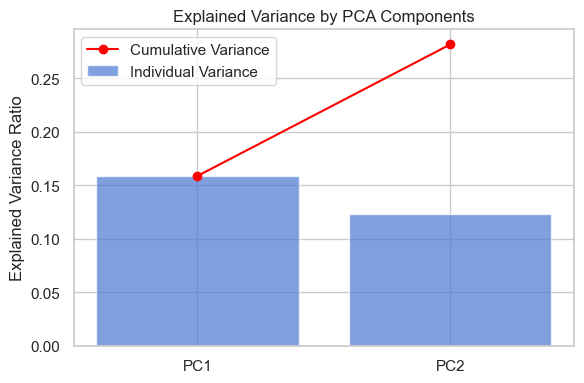

In [122]:
# Plot explained and cumulative variance
plt.figure(figsize=(6, 4))
plt.bar(['PC1', 'PC2'], explained_var, alpha=0.7, label='Individual Variance')
plt.plot(['PC1', 'PC2'], cumulative_var, marker='o', label='Cumulative Variance', color='red')
plt.title('Explained Variance by PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

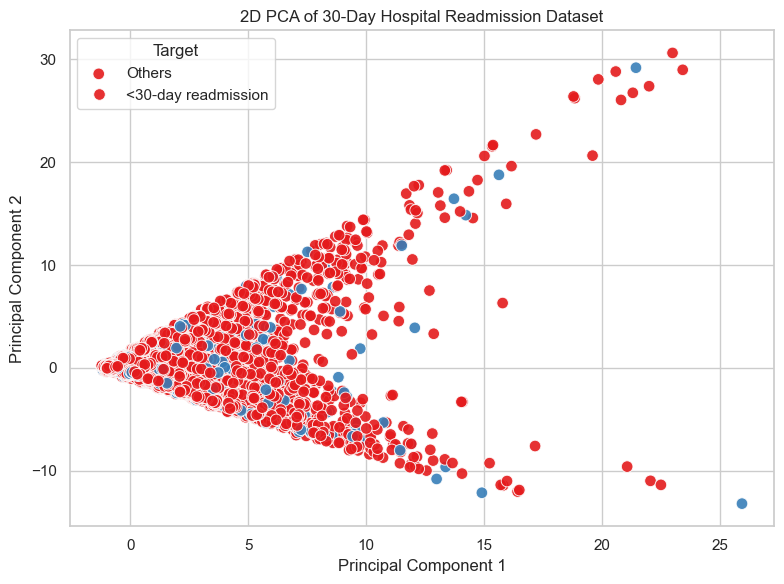

In [123]:
# Create 2D PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', s=70, alpha=0.9)
plt.title('2D PCA of 30-Day Hospital Readmission Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', labels=['Others', '<30-day readmission'])
plt.grid(True)
plt.tight_layout()
plt.show()

##### Train model

In [124]:
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='lbfgs'
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced'
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
}

In [125]:
best_auc = 0
best_model = None
best_model_name = None

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_pruned, y_train)

    # Probabilities
    y_prob = model.predict_proba(X_test_pruned)[:, 1]

    # Default threshold = 0.5
    y_pred = (y_prob >= 0.5).astype(int)

    auc = roc_auc_score(y_test, y_prob)
    pr = average_precision_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred)

    results.append({
        "Model": name,
        "AUC-ROC": auc,
        "AUC-PR": pr,
        "Recall": recall
    })

    # Save best model
    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_model_name = name

Training LogisticRegression...
Training RandomForest...
Training GradientBoosting...


In [126]:
# Save the best model using joblib
joblib.dump(best_model, f"models/{best_model_name}_pruned.pkl")
print(f"Best model saved: {best_model_name} (AUC-ROC = {best_auc:.4f})")

Best model saved: GradientBoosting (AUC-ROC = 0.6736)


In [127]:
def recall_at_precision(y_true, y_prob, target_precision=0.80):
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    valid = np.where(precision[:-1] >= target_precision)[0]
    return recall[valid[-1]] if len(valid) > 0 else 0

results = []

for name, model in models.items():
    model.fit(X_train_pruned, y_train)
    y_prob = model.predict_proba(X_test_pruned)[:, 1]

    results.append({
        "Model": name,
        "Recall @ P≥0.80": recall_at_precision(y_test, y_prob)
    })

pd.DataFrame(results).sort_values("Recall @ P≥0.80", ascending=False)

,Model,Recall @ P≥0.80
1,RandomForest,0.00044
2,GradientBoosting,0.00044
0,LogisticRegression,0.00000


Recall @ fixed precision (important for imbalanced medical datasets)

In [128]:
def recall_at_precision(y_true, y_prob, target_precision=0.80):
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    valid_idx = np.where(precision[:-1] >= target_precision)[0]
    return recall[valid_idx[-1]] if len(valid_idx) > 0 else 0

for name, model in models.items():
    y_prob = model.predict_proba(X_test_pruned)[:, 1]
    print(f"{name} - Recall @ Precision ≥ 0.8: {recall_at_precision(y_test, y_prob):.3f}")

LogisticRegression - Recall @ Precision ≥ 0.8: 0.000
RandomForest - Recall @ Precision ≥ 0.8: 0.000
GradientBoosting - Recall @ Precision ≥ 0.8: 0.000


****************************************
### **Step 5: Critical Thinking → Ethical AI & Bias Auditing**
****************************************


In this part of the project, the following will be conducted:

1. Model explainability
2. Bias Detection Questions
    - Does my model perform equally well across demographic groups?
    - Are there features that could serve as proxies for protected attributes?
    - Would different groups be harmed by model errors?
3. Document Limitations
    - Class imbalance and how you addressed it
    - Potential data leakage concerns
    - Generalization limitations (will this work on new data?)

##### **Model Explainability**

**SHAP tool** is used to explain each feature contribution value to push a specific patient's risk relative to the baseline readmission rate.

In [129]:
explainer_lr = shap.LinearExplainer(
    models["LogisticRegression"],
    X_train_pruned,
    feature_perturbation="interventional"
)

shap_values_lr = explainer_lr.shap_values(X_test_pruned)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


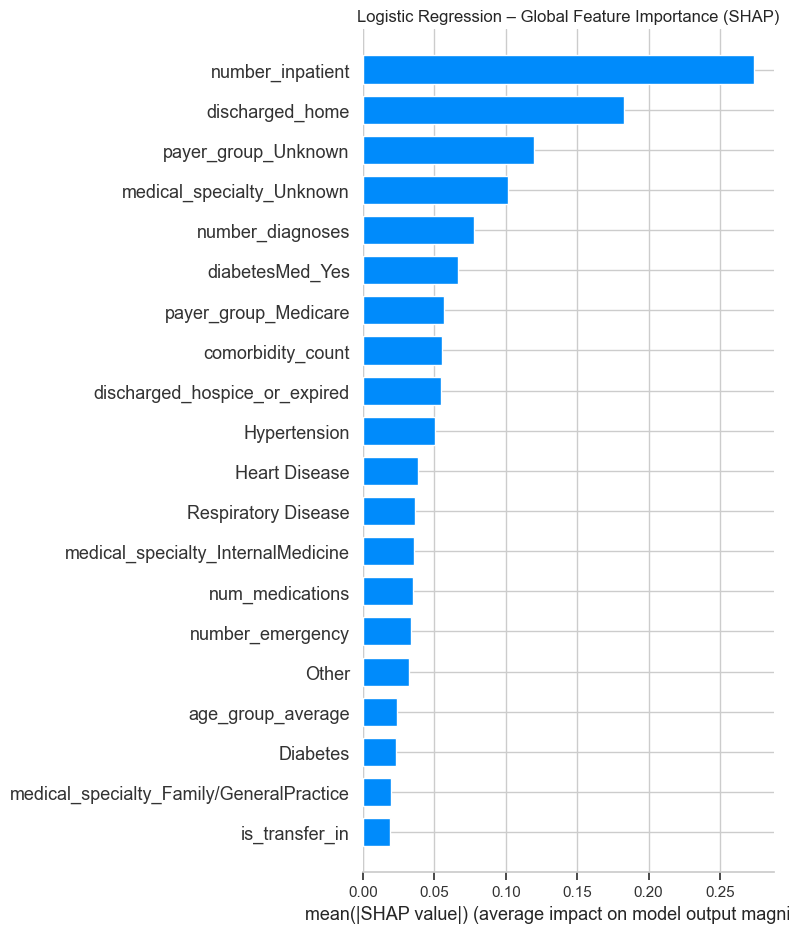

In [142]:
plt.figure(figsize=(10, 6))

shap.summary_plot(
    shap_values_lr,
    X_test_pruned,
    plot_type="bar",
    show=False
)

plt.title("Logistic Regression – Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

SHAP for Tree Models (RF & Gradient Boosting)

In [131]:
# explainer_tree = shap.TreeExplainer(models["RandomForest"])
# shap_values_rf = explainer_tree.shap_values(X_test_final)

In [132]:
explainer_tree = shap.TreeExplainer(models["GradientBoosting"])
shap_values_gb = explainer_tree.shap_values(X_test_pruned)

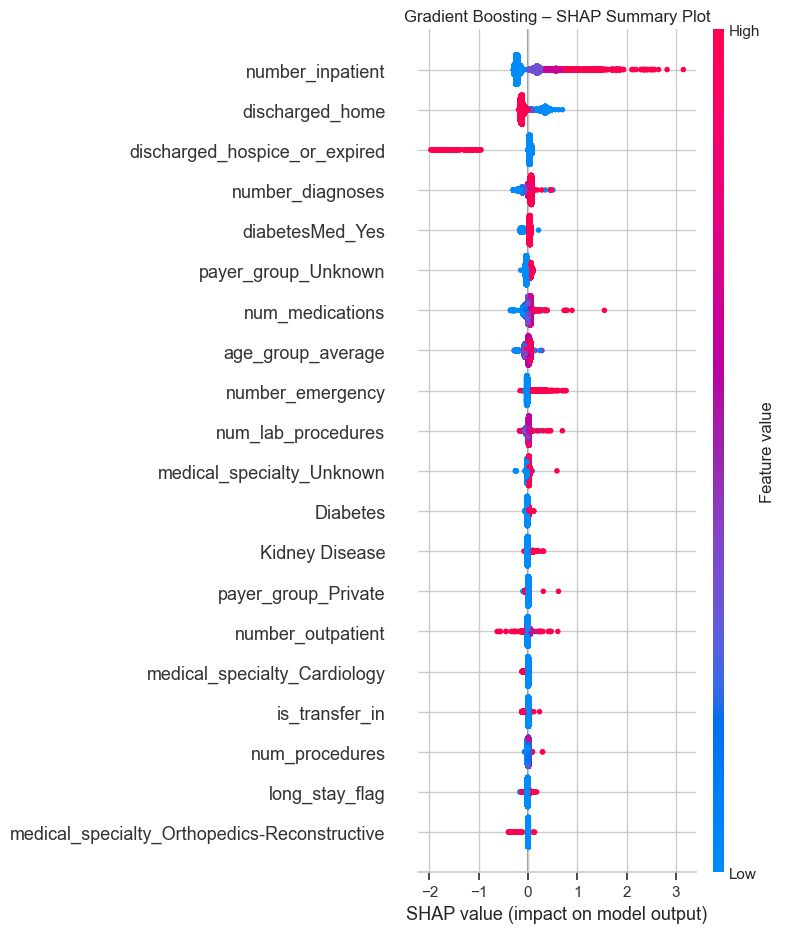

In [133]:
shap.summary_plot(
    shap_values_gb,
    X_test_pruned,
    show=False
)
plt.title("Gradient Boosting – SHAP Summary Plot")
plt.tight_layout()
plt.show()

**SHAP Summary Plot Interpretation:**

- The strongest driver for readmission is `num_inpatient` with high feature value on the right side of baseline means *high inpatient visit = increase risk*
- But since it also has a *wide spread*, this feature *still varies for each patient*.
- Other features that have **positive wide SHAP** spread are:
    - `num_medications`
    - `num_emergency`
    - `num_procedures`
- The features with **negative SHAP** that reduces the probability of readmission:
    - `discharge_home`
    - `discharge_hospice_or_expired`
    - `medical_specialty_Orthopedics-Reconstructive`
    - if the patient has the following feature value above, their readmission risk goes down
- The `num_outpatient` feature both have almost equal **high feature values on the positive and negative side of the baseline** which means that high outpatient visit count sometimes increase risl or decrease risk depending on patient context.

##### **Fairness & Bias Auditig**

*This part of the project checked whether the model behaves differently for protected groups*

In [134]:
# Prepare sensitive attributes
sensitive_df = X_test[['race', 'gender', 'age_group_average']].copy()
sensitive_df['y_true'] = y_test.values
sensitive_df['y_prob'] = y_prob
sensitive_df['y_pred'] = (y_prob >= 0.5).astype(int)

In [135]:
# Prepare sensitive attributes
def fairness_by_group(df, group_col, ref_group=None):
    rows = []

    for group, g in df.groupby(group_col):
        tp = ((g['y_pred'] == 1) & (g['y_true'] == 1)).sum()
        tn = ((g['y_pred'] == 0) & (g['y_true'] == 0)).sum()
        fp = ((g['y_pred'] == 1) & (g['y_true'] == 0)).sum()
        fn = ((g['y_pred'] == 0) & (g['y_true'] == 1)).sum()

        rows.append({
            group_col: group,
            "Support": len(g),
            "Positive Rate": (tp + fp) / len(g),
            "TPR": tp / (tp + fn) if (tp + fn) > 0 else 0,
            "FPR": fp / (fp + tn) if (fp + tn) > 0 else 0
        })

    result = pd.DataFrame(rows)

    # Add ratios (fairness comparison)
    if ref_group is not None:
        ref = result[result[group_col] == ref_group].iloc[0]
        for col in ["Positive Rate", "TPR", "FPR"]:
            result[f"{col} Ratio"] = result[col] / ref[col]

    return result

In [136]:
# Race fairness table
ref_race = sensitive_df['race'].mode()[0]
race_fairness = fairness_by_group(
    sensitive_df,
    group_col='race',
    ref_group=ref_race
)

race_fairness

,race,Support,Positive Rate,TPR,FPR,Positive Rate Ratio,TPR Ratio,FPR Ratio
0,AfricanAmerican,3866,0.001293,0.006944,0.000582,0.703154,0.745226,0.655504
1,Asian,123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Caucasian,15223,0.001839,0.009319,0.000888,1.000000,1.000000,1.000000
3,Hispanic,404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Other,276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Unknown,462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [137]:
# Gender fairness table
ref_gender = sensitive_df['gender'].mode()[0]
gender_fairness = fairness_by_group(
    sensitive_df,
    group_col='gender',
    ref_group=ref_gender
)

gender_fairness

,gender,Support,Positive Rate,TPR,FPR,Positive Rate Ratio,TPR Ratio,FPR Ratio
0,Female,10924,0.001922,0.008765,0.001034,1.00000,1.000000,1.000000
1,Male,9430,0.001273,0.007874,0.000475,0.66196,0.898354,0.459662


In [138]:
# Age fairness table
ref_age = sensitive_df['age_group_average'].mode()[0]
age_fairness = fairness_by_group(
    sensitive_df,
    group_col='age_group_average',
    ref_group=ref_age
)

age_fairness

,age_group_average,Support,Positive Rate,TPR,FPR,Positive Rate Ratio,TPR Ratio,FPR Ratio
0,5.0,34,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,15.0,130,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,25.0,324,0.043210,0.209302,0.017794,113.080247,65.720930,inf
3,35.0,725,0.005517,0.012821,0.004637,14.438621,4.025641,inf
4,45.0,1913,0.001568,0.005319,0.001159,4.104025,1.670213,inf
5,55.0,3457,0.002025,0.016611,0.000634,5.299103,5.215947,inf
6,65.0,4547,0.000660,0.001890,0.000498,1.726633,0.593573,inf
7,75.0,5234,0.000382,0.003185,0.000000,1.000000,1.000000,NaN
8,85.0,3414,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
9,95.0,576,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [139]:
# Disparate Impact (Demographic Parity)
def disparate_impact(df, group_col):
    rates = df.groupby(group_col)['y_pred'].mean()
    return rates.min() / rates.max()

print("Race Disparate Impact:", disparate_impact(sensitive_df, 'race'))
print("Gender Disparate Impact:", disparate_impact(sensitive_df, 'gender'))
print("Age Disparate Impact:", disparate_impact(sensitive_df, 'age_group_average'))

Race Disparate Impact: 0.0
Gender Disparate Impact: 0.6619603090440842
Age Disparate Impact: 0.0


**Fairness Metric Interpretation per attributes:**
1. `race`:  lower performance metrics for `AfricanAmerican` group compared to `Caucasian` group (majority) and 0 performance metrics for the remaining race suggesting that the model is less likely or not likely to predict readmission even when readmission actually occurred indicating **potential under-detection for this group**.
2. `gender`: slightly lower performance metric result for `Male` group compared to `Female` group in terms of **positive prediction and true positive prediction rates**. The false positive rate may be exceedingly lower for Male but it means there are missed true positives, which is a critical concern in clinical risk prediction settings.

**Disparate Impact Interpretation per attributes:**
- Both `race` and `age` resulted to *disparate value of 0.0* that means there are certain population that do have 0 PR and TPR indicating the **models' non-responsiveness for these populations**.
- While `gender` resulted to a *disparate value of 0.66* indicating that the unprivileged population's PR = 66% PR of the majority population which is **below the 0.80 threshold**.

**Overall Disparate Impact Interpretation:**
- Severe outcome disparities across `race` and `age` groups, and moderate disparity across `gender`, with results **largely influenced by class imbalance and subgroup underrepresentation**.

##### **Document Limitations**
1. Class imbalance
    - class imbalance was addressed by using `class_weight` for Logistic Regression and Random Forest. This is the primary strategy because I want to **keep the clinical realism of the data** instead of creating unrealistic synthetic samples.
    - **No threshold tuning** for GradientBoost was conducted to mitigate class imbalance becuase I used a code that will iterate to the 3 models chosen above.
    - But since all the True Positive Rates are all <0.60, `SMOTE` will be the **second strategy** for recall improvement.

2. Feature Limitations
    - The raw columns of my feature engineered data were dropped for the purpose of reduced redundacy and dimensionality reduction. 
    - This is not a standard practice but training the model with thousands of features takes too much time to train and tune and retrain again. 
    - I hypothesized that if I created feature engineered columns based on CMS domain-specific, it will have better perfomance compared to other existing hospital readmission models, but it seems to be not the case.
    - This strategy is largely affected by **class imbalance**.

3. Data Leakage
    - I went back and forth if I should put *scaling and encoding before model implementation* (as the capstone_guide and previous lessons suggested) or *putting after splitting the train and test set based on what I read on ResearchGate **to prevent data leakage***. 
    - It is possible that the performance metric result is caused by this. Either it will overfit or underfit, reinforcing the complexity of the problem.


##### **Future Work**
1. Learn to minimize runtime while processing high-dimensional data.
2. Improve skills on how to handle class imbalance.
3. Improve skills on parameter tuning.